# Phishing URL Model Generalization

In this notebook I'll provide a comprehensive demonstration of the **lack of generalization state-of-the-art** models seem to have. As documented by Fariza Rashid et al., models tested on different sources from the one they were trained on (which is a very important test for deployment reliability) have very high metric drops (ranging from 10 to 30\% drops!). Hence I'll create a simple model to compare with the most popular approach that is available open-source (details below).

This code can be outlined as follows:
- We start by judging the quality solely train/test metrics 
- We then show good metrics (illustrating how high metrics on a single dataset can be misleading for real-world generalization)
- Generalization Comparison

# Models

Let's start by defining the models. In this notebook I'll compare a **Character-Level CNN** with trainable embeddings (inspired by **[1]** **[2]**) and the official **URLNet** **[3]**. 

All technicals details are in my paper and are not the focus of this notebook.

Since URLNet was created in 2019 with deprecated tensorflow and python versions, it can't be defined in this notebook, however I made it easily accessible in: https://www.kaggle.com/code/pafonso/urlnet-phishing-url-detection/run (using the official URLNet Github **[4]**).

Let's start by importing all necessary modules.

I will also be using dataset-building functions covered in the previous notebook (you can check them but they're fairly easy to infer from their names).

In [1]:
from modelCLC import * #my pytorch implementation of character level CNN
from helperDS import * #helper functions regarding dataframes

In [2]:
datasets = buildDataframes()

Kaggle4S sucessfully loaded!
Kaggle2020 sucessfully loaded!
Kaggle2019 sucessfully loaded!
Kaggle2021 sucessfully loaded!
Look Before Leap data sucessfully loaded!
EBBU2017 sucessfully loaded!
HISPAR sucessfully loaded!
ISCX-URL2016 sucessfully loaded!


### Init Dataset

In [10]:
df_combined = n_combiner(datasets, subset = ['kaggle4s', 'kaggle2019', 'iscx'], verbose=True, prep=True, pref=True, to_lower=False) #removes dup; ######prep = True MUCH MORE DISCARDED
df_validation_pre = datasets['hispar'] 

print("--------------------------------------------------------------")

print("Initialising discarding for validation.")
df_validation_pre = discarder(df_validation_pre, verbose=True) #in general, let's make sure no dups & conflicts internally
print("Initialising preprocessing for validation.")
df_validation_pre = preprocess_df(df_validation_pre, prefix=True, lower=False)
print("Preprocessed finished for validation.")
df_validation = remove_common_urls(df_validation_pre, df_combined) #make sure none of the training is in the validation

Starting merge for subset = ['kaggle4s', 'kaggle2019', 'iscx']
-----------------------------------------------------------------
N_initial = 1292151
=> Found 448340 URLs to discard.
N_final = 843811

Dataframe w/ subset ['kaggle4s', 'kaggle2019', 'iscx'] sucessfully built.
--------------------------------------------------------------
Initialising discarding for validation.
There were 0 duplicates removed.
Initialising preprocessing for validation.
Preprocessed finished for validation.


## My Character-Level CNN vs. URLNet Generalization

In [4]:
clc_TF = MyCLC(df_combined, df_val=df_validation, prep=False, prefix=True, to_lower=False, num_epochs=12, split = True)

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 421
cmap = {'d': 83, 'B': 16, '!': 5, 'R': 37, 'V': 33, 'e': 30, '9': 19, '@': 15, 'b': 71, 'K': 13, 'G': 56, '?': 6, 'S': 84, '&': 77, '/': 29, '(': 31, ')': 66, 'N': 74, '*': 27, '7': 55, '.': 81, ';': 59, 'E': 39, '+': 80, 'l': 53, ' ': 57, '#': 2, 'H': 50, 'C': 62, '-': 12, 'D': 46, 'f': 72, '_': 23, 'I': 63, 'n': 11, '1': 79, 'T': 65, '4': 54, 'p': 8, '2': 7, 'w': 26, 'U': 48, 'h': 24, 't': 44, ',': 40, 'g': 18, 'c': 4, 'z': 78, 'X': 36, 'J': 9, 'F': 76, 'M': 47, '3': 20, '5': 25, '$': 34, 'm': 45, 'Z': 43, 'j': 42, 'a': 3, 'u': 49, '6': 86, 'y': 52, '~': 67, 'Y': 38, 'O': 69, '0': 14, 'r': 10, 'Q': 85, '8': 73, '%': 35, 'q': 17, 'W': 58, '=': 22, 'L': 61, 'v': 75, "'": 28, 'o': 70, 'x': 21, 'A': 82, '\\': 68, 's': 51, 'P': 32, ':': 41, 'i': 60, 'k': 64}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 3 data loaders.


------------------------

Epoch [1/12]: 100%|██████████| 660/660 [04:09<00:00,  2.64it/s, batch_idx=660, loss=0.169] 


Epoch [1/12] completed with average loss: 0.1860
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:42<00:00,  3.85it/s, accuracy=0.961, batch_idx=165]


Accuracy: 0.961
Precision: 0.955
Recall: 0.965
F1-Score: 0.96
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:24<00:00,  3.66it/s, accuracy=0.868, batch_idx=90]


Accuracy: 0.868
Precision: 0.798
Recall: 0.986
F1-Score: 0.882


--------------------------------------------------------------------------------------------




Epoch [2/12]: 100%|██████████| 660/660 [04:04<00:00,  2.70it/s, batch_idx=660, loss=0.0959]


Epoch [2/12] completed with average loss: 0.1108
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:42<00:00,  3.89it/s, accuracy=0.967, batch_idx=165]


Accuracy: 0.967
Precision: 0.963
Recall: 0.969
F1-Score: 0.966
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:24<00:00,  3.63it/s, accuracy=0.88, batch_idx=90] 


Accuracy: 0.88
Precision: 0.813
Recall: 0.987
F1-Score: 0.891


--------------------------------------------------------------------------------------------




Epoch [3/12]: 100%|██████████| 660/660 [04:08<00:00,  2.65it/s, batch_idx=660, loss=0.073] 


Epoch [3/12] completed with average loss: 0.0948
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:43<00:00,  3.81it/s, accuracy=0.97, batch_idx=165] 


Accuracy: 0.97
Precision: 0.967
Recall: 0.971
F1-Score: 0.969
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.58it/s, accuracy=0.894, batch_idx=90]


Accuracy: 0.894
Precision: 0.832
Recall: 0.988
F1-Score: 0.903


--------------------------------------------------------------------------------------------




Epoch [4/12]: 100%|██████████| 660/660 [04:54<00:00,  2.24it/s, batch_idx=660, loss=0.0803]


Epoch [4/12] completed with average loss: 0.0863
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:54<00:00,  3.04it/s, accuracy=0.973, batch_idx=165]


Accuracy: 0.973
Precision: 0.975
Recall: 0.968
F1-Score: 0.971
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.02it/s, accuracy=0.899, batch_idx=90]


Accuracy: 0.899
Precision: 0.841
Recall: 0.986
F1-Score: 0.907


--------------------------------------------------------------------------------------------




Epoch [5/12]: 100%|██████████| 660/660 [05:55<00:00,  1.86it/s, batch_idx=660, loss=0.111] 


Epoch [5/12] completed with average loss: 0.0806
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:53<00:00,  3.11it/s, accuracy=0.974, batch_idx=165]


Accuracy: 0.974
Precision: 0.97
Recall: 0.974
F1-Score: 0.972
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.03it/s, accuracy=0.887, batch_idx=90]


Accuracy: 0.887
Precision: 0.821
Recall: 0.988
F1-Score: 0.897


--------------------------------------------------------------------------------------------




Epoch [6/12]: 100%|██████████| 660/660 [05:36<00:00,  1.96it/s, batch_idx=660, loss=0.112] 


Epoch [6/12] completed with average loss: 0.0763
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:49<00:00,  3.33it/s, accuracy=0.974, batch_idx=165]


Accuracy: 0.974
Precision: 0.971
Recall: 0.974
F1-Score: 0.973
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:28<00:00,  3.14it/s, accuracy=0.888, batch_idx=90]


Accuracy: 0.888
Precision: 0.824
Recall: 0.987
F1-Score: 0.898


--------------------------------------------------------------------------------------------




Epoch [7/12]: 100%|██████████| 660/660 [05:46<00:00,  1.90it/s, batch_idx=660, loss=0.0542]


Epoch [7/12] completed with average loss: 0.0718
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:52<00:00,  3.15it/s, accuracy=0.976, batch_idx=165]


Accuracy: 0.976
Precision: 0.976
Recall: 0.972
F1-Score: 0.974
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:31<00:00,  2.88it/s, accuracy=0.902, batch_idx=90]


Accuracy: 0.902
Precision: 0.844
Recall: 0.986
F1-Score: 0.91


--------------------------------------------------------------------------------------------




Epoch [8/12]: 100%|██████████| 660/660 [06:04<00:00,  1.81it/s, batch_idx=660, loss=0.0658]


Epoch [8/12] completed with average loss: 0.0698
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:51<00:00,  3.20it/s, accuracy=0.975, batch_idx=165]


Accuracy: 0.975
Precision: 0.97
Recall: 0.978
F1-Score: 0.974
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.02it/s, accuracy=0.882, batch_idx=90]


Accuracy: 0.882
Precision: 0.814
Recall: 0.989
F1-Score: 0.893


--------------------------------------------------------------------------------------------




Epoch [9/12]: 100%|██████████| 660/660 [05:54<00:00,  1.86it/s, batch_idx=660, loss=0.0357]


Epoch [9/12] completed with average loss: 0.0665
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:52<00:00,  3.17it/s, accuracy=0.976, batch_idx=165]


Accuracy: 0.976
Precision: 0.976
Recall: 0.974
F1-Score: 0.975
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.07it/s, accuracy=0.902, batch_idx=90]


Accuracy: 0.902
Precision: 0.844
Recall: 0.986
F1-Score: 0.91


--------------------------------------------------------------------------------------------




Epoch [10/12]: 100%|██████████| 660/660 [05:55<00:00,  1.86it/s, batch_idx=660, loss=0.0404]


Epoch [10/12] completed with average loss: 0.0638
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:50<00:00,  3.27it/s, accuracy=0.976, batch_idx=165]


Accuracy: 0.976
Precision: 0.973
Recall: 0.976
F1-Score: 0.975
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.05it/s, accuracy=0.901, batch_idx=90]


Accuracy: 0.901
Precision: 0.842
Recall: 0.988
F1-Score: 0.909


--------------------------------------------------------------------------------------------




Epoch [11/12]: 100%|██████████| 660/660 [05:43<00:00,  1.92it/s, batch_idx=660, loss=0.0533]


Epoch [11/12] completed with average loss: 0.0625
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:46<00:00,  3.55it/s, accuracy=0.976, batch_idx=165]


Accuracy: 0.976
Precision: 0.971
Recall: 0.979
F1-Score: 0.975
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:27<00:00,  3.32it/s, accuracy=0.885, batch_idx=90]


Accuracy: 0.885
Precision: 0.818
Recall: 0.989
F1-Score: 0.896


--------------------------------------------------------------------------------------------




Epoch [12/12]: 100%|██████████| 660/660 [05:35<00:00,  1.97it/s, batch_idx=660, loss=0.0699]


Epoch [12/12] completed with average loss: 0.0602
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 165/165 [00:45<00:00,  3.63it/s, accuracy=0.976, batch_idx=165]


Accuracy: 0.976
Precision: 0.971
Recall: 0.979
F1-Score: 0.975
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.48it/s, accuracy=0.883, batch_idx=90]


Accuracy: 0.883
Precision: 0.816
Recall: 0.99
F1-Score: 0.894

Finished. Training, Testing and Validation Complete!


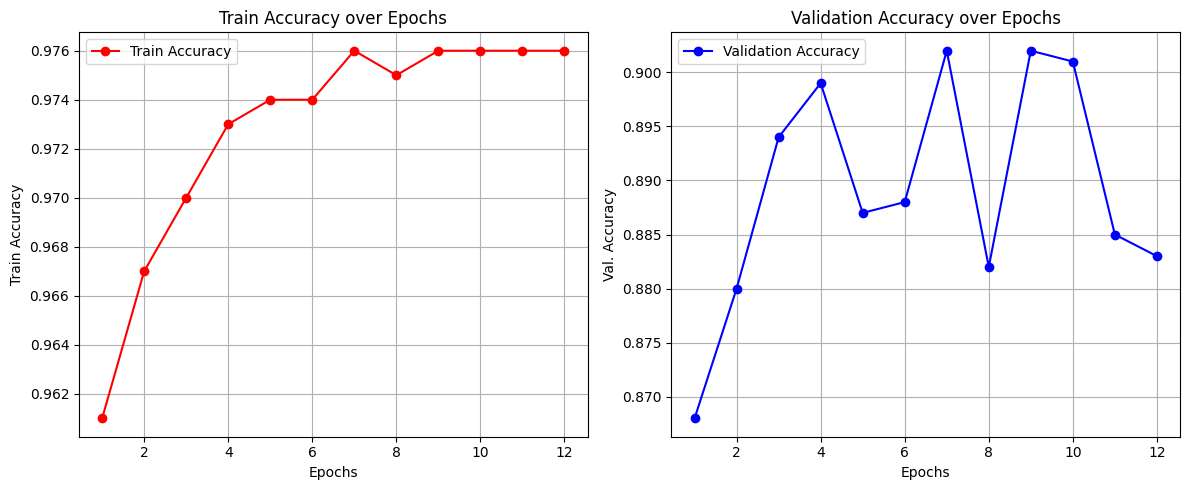

In [5]:
clc_TF.run()

Finished training! Optional: Save the model:

In [7]:
clc_TF.save_model('models/clc1-4s-2019-iscx_TF.pt')

Model and parameters saved to models/clc1-4s-2019-iscx_TF.pt


_____________________________

# Run 2 - CLC vs. URLNet Generalizibility | PREP = True

In [ ]:
df_combined = n_combiner(datasets, subset = ['kaggle4s'], verbose=True, prep=True, pref=True, to_lower=True) #removes dup; ######prep = True MUCH MORE DISCARDED
df_validation_pre = datasets['hispar']

print("--------------------------------------------------------------")
print("Initialising discarding for validation.")
df_validation_pre = discarder(df_validation_pre, verbose=True) #in general, let's make sure no dups & conflicts internally
print("Initialising preprocessing for validation.")
df_validation_pre = preprocess_df(df_validation_pre, prefix=True, lower=True)
print("Preprocessed finished for validation.")
df_validation = remove_common_urls(df_validation_pre, df_combined) #make sure none of the training is in the validation

Starting merge for subset = ['kaggle4s']
-------------------------------------------
N_initial = 822010
=> Found 29528 URLs to discard.
N_final = 792482

Dataframe w/ subset ['kaggle4s'] sucessfully built.
--------------------------------------------------------------
Initialising discarding for validation.
There were 0 duplicates removed.
Initialising preprocessing for validation.
Preprocessed finished for validation.


In [41]:
clc_4s = MyCLC(df_combined, df_val=df_validation, prep=False, num_epochs=8, split = True)

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 396
cmap = {'m': 42, '4': 9, 'p': 3, '+': 49, 'l': 19, '2': 17, 'w': 16, 'd': 10, ' ': 56, 'j': 8, '#': 45, 'a': 36, '!': 7, '6': 39, 'u': 29, 'y': 4, 'h': 57, 't': 47, ',': 15, 'g': 53, 'e': 34, 'c': 43, '~': 37, '0': 14, 'z': 28, 'r': 40, '9': 30, '@': 20, 'b': 52, '8': 27, '%': 51, 'q': 2, '-': 26, 'f': 59, '_': 24, '?': 41, '=': 12, ';': 31, 'n': 6, 'v': 50, "'": 23, 'o': 5, '&': 44, '/': 32, 'x': 38, '(': 33, ')': 48, '*': 11, '7': 21, 's': 35, '\\': 58, '3': 55, '5': 22, ':': 18, '.': 13, 'i': 54, 'k': 25, '1': 46}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 3 data loaders.


-----------------------------------------------------------------------------------------


Device cuda is available. Initialising training:


Epoch [1/8]: 100%|██████████| 620/620 [03:51<00:00,  2.68it/s, batch_idx=620, loss=0.145] 


Epoch [1/8] completed with average loss: 0.1674
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:39<00:00,  3.92it/s, accuracy=0.967, batch_idx=155]


Accuracy: 0.967
Precision: 0.964
Recall: 0.965
F1-Score: 0.964
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.57it/s, accuracy=0.884, batch_idx=90]


Accuracy: 0.884
Precision: 0.82
Recall: 0.983
F1-Score: 0.894


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 620/620 [03:48<00:00,  2.71it/s, batch_idx=620, loss=0.103] 


Epoch [2/8] completed with average loss: 0.0948
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:39<00:00,  3.92it/s, accuracy=0.973, batch_idx=155]


Accuracy: 0.973
Precision: 0.982
Recall: 0.958
F1-Score: 0.97
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.56it/s, accuracy=0.905, batch_idx=90]


Accuracy: 0.905
Precision: 0.854
Recall: 0.978
F1-Score: 0.912


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 620/620 [03:56<00:00,  2.62it/s, batch_idx=620, loss=0.069] 


Epoch [3/8] completed with average loss: 0.0804
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:39<00:00,  3.95it/s, accuracy=0.976, batch_idx=155]


Accuracy: 0.976
Precision: 0.981
Recall: 0.967
F1-Score: 0.974
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.58it/s, accuracy=0.895, batch_idx=90]


Accuracy: 0.895
Precision: 0.836
Recall: 0.983
F1-Score: 0.904


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 620/620 [03:57<00:00,  2.61it/s, batch_idx=620, loss=0.128] 


Epoch [4/8] completed with average loss: 0.0727
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:40<00:00,  3.82it/s, accuracy=0.978, batch_idx=155]


Accuracy: 0.978
Precision: 0.98
Recall: 0.972
F1-Score: 0.976
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.54it/s, accuracy=0.895, batch_idx=90]


Accuracy: 0.895
Precision: 0.835
Recall: 0.984
F1-Score: 0.904


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 620/620 [03:59<00:00,  2.59it/s, batch_idx=620, loss=0.0663]


Epoch [5/8] completed with average loss: 0.0674
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:39<00:00,  3.91it/s, accuracy=0.978, batch_idx=155]


Accuracy: 0.978
Precision: 0.984
Recall: 0.969
F1-Score: 0.977
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.50it/s, accuracy=0.905, batch_idx=90]


Accuracy: 0.905
Precision: 0.85
Recall: 0.982
F1-Score: 0.912


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 620/620 [04:01<00:00,  2.56it/s, batch_idx=620, loss=0.0749]


Epoch [6/8] completed with average loss: 0.0626
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:39<00:00,  3.88it/s, accuracy=0.979, batch_idx=155]


Accuracy: 0.979
Precision: 0.983
Recall: 0.972
F1-Score: 0.977
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.59it/s, accuracy=0.9, batch_idx=90]  


Accuracy: 0.9
Precision: 0.843
Recall: 0.982
F1-Score: 0.907


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 620/620 [04:02<00:00,  2.55it/s, batch_idx=620, loss=0.052] 


Epoch [7/8] completed with average loss: 0.0598
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:40<00:00,  3.85it/s, accuracy=0.979, batch_idx=155]


Accuracy: 0.979
Precision: 0.98
Recall: 0.974
F1-Score: 0.977
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.51it/s, accuracy=0.906, batch_idx=90]


Accuracy: 0.906
Precision: 0.853
Recall: 0.982
F1-Score: 0.913


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 620/620 [04:04<00:00,  2.53it/s, batch_idx=620, loss=0.0548]


Epoch [8/8] completed with average loss: 0.0574
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 155/155 [00:40<00:00,  3.87it/s, accuracy=0.98, batch_idx=155] 


Accuracy: 0.98
Precision: 0.986
Recall: 0.971
F1-Score: 0.979
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:25<00:00,  3.59it/s, accuracy=0.909, batch_idx=90]


Accuracy: 0.909
Precision: 0.856
Recall: 0.981
F1-Score: 0.915

Finished. Training, Testing and Validation Complete!


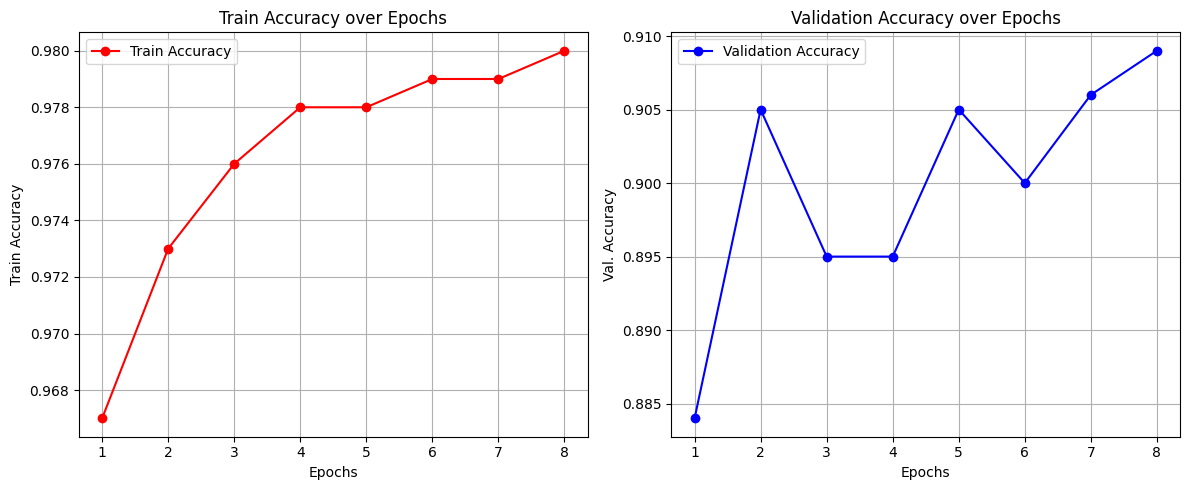

In [42]:
clc_4s.run()

In [43]:
openphish, phishtank = buildPhish()

openphish = remove_common_urls(openphish, df_combined)
phishtank = remove_common_urls(phishtank, df_combined)

In [45]:
clc_4s.test(phishtank)
print("___________________________\n")
clc_4s.test(openphish)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 67/67 [00:16<00:00,  4.03it/s, accuracy=0.903, batch_idx=67]


Accuracy: 0.903
Precision: 1.0
Recall: 0.903
F1-Score: 0.949
___________________________

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s, accuracy=0.931, batch_idx=7]

Accuracy: 0.931
Precision: 1.0
Recall: 0.931
F1-Score: 0.964


In [46]:
clc_4s.save_model('models/clc2_4s_prep.pt')

Model and parameters saved to models/clc2_4s_prep.pt


### URLNet Results | prep = True

**params**: !python train.py --data.data_dir 'datasetsF/4s.txt' --data.dev_pct 0.20 --data.delimit_mode 1 --data.min_word_freq 1 --model.emb_mode 1 --model.emb_dim 200 --model.filter_sizes 3,4,5,6 --train.nb_epochs 8 --train.batch_size 256 --log.print_every 50 --log.eval_every 500 --log.checkpoint_every 500 --log.output_dir 'myModels/model1/model4s_'

Number of baches in total: 19816
Number of batches per epoch: 2477
emb_mode 1 delimit_mode 1 train_size 633986: 100% 19816/19816 [1:09:11<00:00,  4.77it/s, dev_acc=9.797e-01, dev_loss=5.822e-02, min_dev_loss=5.822e-02, trn_acc=9.883e-01, trn_loss=4.470e-02] #train/test on 20% kaggles

Training Acc: 0.988
Testing Acc: 0.980

- **Hispar** Accuracy: 0.889
- **PhishTank** Accuracy: 0.924
- **OpenPhish** Accuracy: 0.950


____

### CLC_4S Results | prep = True

Testing Acc: 0.980

- **Hispar** Accuracy: 0.909
- **PhishTank** Accuracy: 0.903
- **OpenPhish** Accuracy: 0.931


| Model          | Preprocessing | Testing Accuracy | Hispar Accuracy | PhishTank Accuracy | OpenPhish Accuracy |
|----------------|---------------|------------------|-----------------|--------------------|--------------------|
| URLNet         | True          | 0.980            | 0.889           | 0.924              | 0.950              |
| CLC_4S         | True          | 0.980            | 0.909           | 0.903              | 0.931              |

_______

### phishtank + hispar / openphish + hispar (as validation)

# Run 2 - CLC vs. URLNet Generalizibility | PREP = False

In [58]:
df_combined = n_combiner(datasets, subset = ['kaggle4s'], verbose=True, prep=False, pref=False, to_lower=False) #removes dup; ######prep = True MUCH MORE DISCARDED
df_validation_pre = datasets['hispar']

print("--------------------------------------------------------------")

print("Initialising discarding for validation.")
df_validation_pre = discarder(df_validation_pre, verbose=True) #in general, let's make sure no dups & conflicts internally

print("No preprocessing for validation.")
#df_validation_pre = preprocess_df(df_validation_pre, prefix=True, lower=True)

df_validation = remove_common_urls(df_validation_pre, df_combined) #make sure none of the training is in the validation

Starting merge for subset = ['kaggle4s']
-------------------------------------------
N_initial = 822010
=> Found 13968 URLs to discard.
N_final = 808042

Dataframe w/ subset ['kaggle4s'] sucessfully built.
--------------------------------------------------------------
Initialising discarding for validation.
There were 0 duplicates removed.
No preprocessing for validation.


In [59]:
clc_4s_np = MyCLC(df_combined, df_val=df_validation, prep=False, num_epochs=8, split = True)

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 404
cmap = {'d': 83, 'B': 16, '!': 5, 'R': 37, 'V': 33, 'e': 30, '9': 19, '@': 15, 'b': 71, 'K': 13, 'S': 56, '?': 6, 'G': 85, '&': 76, '/': 29, '(': 31, ')': 66, 'N': 73, '*': 27, '7': 55, '.': 80, ';': 65, 'E': 39, '+': 79, 'l': 53, ' ': 57, '#': 2, 'H': 50, 'C': 61, '-': 12, 'D': 46, 'f': 77, '_': 23, 'I': 62, 'n': 11, '1': 78, 'T': 60, '4': 8, 'p': 7, '2': 26, 'w': 48, 'U': 24, 'h': 44, 't': 40, ',': 18, 'g': 4, 'c': 70, 'z': 36, 'X': 9, 'J': 69, 'F': 47, 'M': 20, '3': 25, '5': 34, 'm': 45, 'Z': 43, 'j': 42, 'a': 3, 'u': 49, '6': 82, 'y': 51, '~': 54, 'Y': 38, 'O': 68, '0': 14, 'r': 10, 'Q': 84, '8': 72, '%': 35, 'q': 17, 'W': 52, 'L': 22, '=': 75, 'v': 74, "'": 28, 'o': 64, 'x': 21, 'A': 81, '\\': 67, 's': 58, 'P': 32, ':': 41, 'i': 59, 'k': 63}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 3 data loaders.


---------------------------------

Epoch [1/8]: 100%|██████████| 632/632 [04:12<00:00,  2.51it/s, batch_idx=632, loss=0.126] 


Epoch [1/8] completed with average loss: 0.1556
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:42<00:00,  3.68it/s, accuracy=0.972, batch_idx=158]


Accuracy: 0.972
Precision: 0.969
Recall: 0.971
F1-Score: 0.97
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.08it/s, accuracy=0.743, batch_idx=90]


Accuracy: 0.743
Precision: 0.661
Recall: 0.998
F1-Score: 0.795


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 632/632 [04:09<00:00,  2.54it/s, batch_idx=632, loss=0.0819]


Epoch [2/8] completed with average loss: 0.0822
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:42<00:00,  3.70it/s, accuracy=0.976, batch_idx=158]


Accuracy: 0.976
Precision: 0.971
Recall: 0.979
F1-Score: 0.975
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.08it/s, accuracy=0.771, batch_idx=90]


Accuracy: 0.771
Precision: 0.685
Recall: 0.998
F1-Score: 0.813


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 632/632 [04:09<00:00,  2.53it/s, batch_idx=632, loss=0.0842]


Epoch [3/8] completed with average loss: 0.0671
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:42<00:00,  3.71it/s, accuracy=0.98, batch_idx=158] 


Accuracy: 0.98
Precision: 0.978
Recall: 0.979
F1-Score: 0.979
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:30<00:00,  2.96it/s, accuracy=0.797, batch_idx=90]


Accuracy: 0.797
Precision: 0.712
Recall: 0.997
F1-Score: 0.831


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 632/632 [04:16<00:00,  2.47it/s, batch_idx=632, loss=0.0632]


Epoch [4/8] completed with average loss: 0.0590
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:42<00:00,  3.73it/s, accuracy=0.982, batch_idx=158]


Accuracy: 0.982
Precision: 0.986
Recall: 0.975
F1-Score: 0.981
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:28<00:00,  3.11it/s, accuracy=0.846, batch_idx=90]


Accuracy: 0.846
Precision: 0.766
Recall: 0.994
F1-Score: 0.865


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 632/632 [04:29<00:00,  2.34it/s, batch_idx=632, loss=0.0278]


Epoch [5/8] completed with average loss: 0.0536
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:42<00:00,  3.73it/s, accuracy=0.983, batch_idx=158]


Accuracy: 0.983
Precision: 0.984
Recall: 0.98
F1-Score: 0.982
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.08it/s, accuracy=0.825, batch_idx=90]


Accuracy: 0.825
Precision: 0.742
Recall: 0.995
F1-Score: 0.85


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 632/632 [04:15<00:00,  2.48it/s, batch_idx=632, loss=0.033] 


Epoch [6/8] completed with average loss: 0.0492
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:46<00:00,  3.40it/s, accuracy=0.984, batch_idx=158]


Accuracy: 0.984
Precision: 0.985
Recall: 0.981
F1-Score: 0.983
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:30<00:00,  2.91it/s, accuracy=0.847, batch_idx=90]


Accuracy: 0.847
Precision: 0.768
Recall: 0.993
F1-Score: 0.866


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 632/632 [04:14<00:00,  2.49it/s, batch_idx=632, loss=0.0726]


Epoch [7/8] completed with average loss: 0.0465
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:44<00:00,  3.58it/s, accuracy=0.984, batch_idx=158]


Accuracy: 0.984
Precision: 0.985
Recall: 0.982
F1-Score: 0.983
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.06it/s, accuracy=0.847, batch_idx=90]


Accuracy: 0.847
Precision: 0.767
Recall: 0.994
F1-Score: 0.866


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 632/632 [04:12<00:00,  2.50it/s, batch_idx=632, loss=0.0497]


Epoch [8/8] completed with average loss: 0.0432
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 158/158 [00:48<00:00,  3.27it/s, accuracy=0.985, batch_idx=158]


Accuracy: 0.985
Precision: 0.988
Recall: 0.979
F1-Score: 0.984
_____________________________________________________________
Device cuda is available. Initialising evaluation:


Validation Set: 100%|██████████| 90/90 [00:29<00:00,  3.03it/s, accuracy=0.874, batch_idx=90]


Accuracy: 0.874
Precision: 0.802
Recall: 0.991
F1-Score: 0.887

Finished. Training, Testing and Validation Complete!


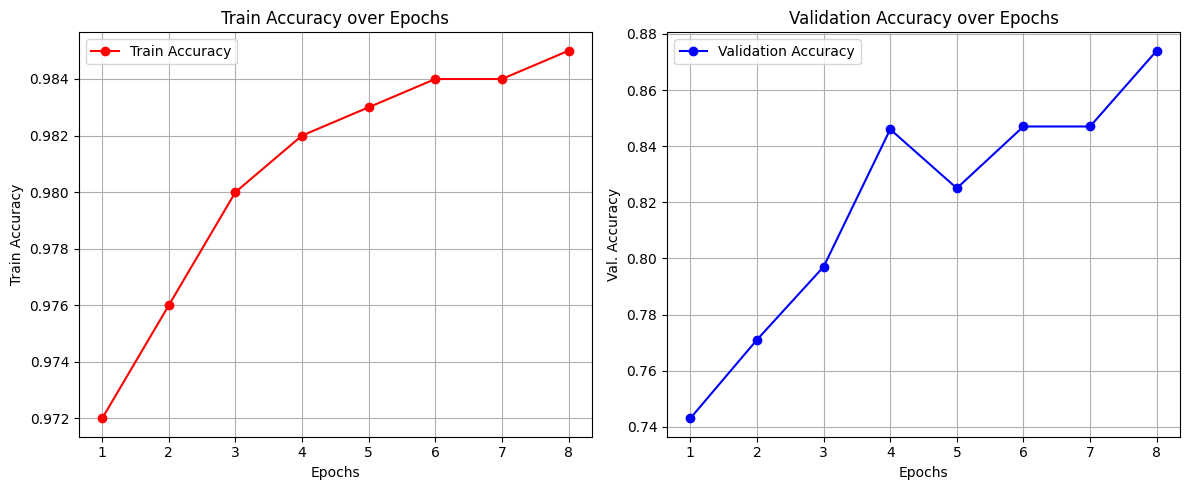

In [60]:
clc_4s_np.run()

In [71]:
clc_4s_np.save_model('models/clc2_4s_noPrep.pt')

Model and parameters saved to models/clc2_4s_noPrep.pt


In [73]:
openphish = pd.read_csv("openphish/openphish6306.csv", header=None)
openphish.columns = ['url']
openphish['status'] = 1

#openphish = preprocess_df(openphish)

with open("phishtank/phish-tank.json", 'r') as file:
    json_phtank = json.load(file)
phishtank = pd.DataFrame(json_phtank)[['url']]
phishtank['status'] = 1

#phishtank = preprocess_df(phishtank)

In [75]:
clc_4s_np.test(phishtank)
clc_4s_np.test(openphish)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 67/67 [00:18<00:00,  3.72it/s, accuracy=0.949, batch_idx=67]


Accuracy: 0.949
Precision: 1.0
Recall: 0.949
F1-Score: 0.974
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s, accuracy=0.974, batch_idx=7]

Accuracy: 0.974
Precision: 1.0
Recall: 0.974
F1-Score: 0.987


### URLNet Results | prep = False

**params**: !python train.py --data.data_dir 'datasetsF/4s_noPrep.txt' --data.dev_pct 0.20 --data.delimit_mode 1 --data.min_word_freq 1 --model.emb_mode 1 --model.emb_dim 200 --model.filter_sizes 3,4,5,6 --train.nb_epochs 8 --train.batch_size 256 --log.print_every 50 --log.eval_every 500 --log.checkpoint_every 500 --log.output_dir 'myModels/model1/model4s_'

Number of baches in total: 20208
Number of batches per epoch: 2526
emb_mode 1 delimit_mode 1 train_size 646435: 100% 20208/20208 [1:11:15<00:00,  4.73it/s, dev_acc=9.829e-01, dev_loss=4.922e-02, min_dev_loss=4.395e-02, trn_acc=9.766e-01, trn_loss=6.200e-02]  #train/test on 20% kaggles

Training Acc: 0.977
Testing Acc:  0.983

- **Hispar** Accuracy: 0.824
- **PhishTank** Accuracy: 0.976
- **OpenPhish** Accuracy: 0.979


____

### CLC_4S Results | prep = False

Testing Acc: 0.985

- **Hispar** Accuracy: 0.874
- **PhishTank** Accuracy: 0.949
- **OpenPhish** Accuracy: 0.974



| Model          | Preprocessing | Testing Accuracy | Hispar Accuracy | PhishTank Accuracy | OpenPhish Accuracy |
|----------------|---------------|------------------|-----------------|--------------------|--------------------|
| URLNet         | False         | 0.983            | 0.824           | 0.976              | 0.979              |
| CLC_4S         | False         | 0.985            | 0.874           | 0.949              | 0.974              |


## Final Table Run 2 (4S / Val on Hispar)

| Model          | Preprocessing | Testing Accuracy | Hispar Accuracy | PhishTank Accuracy | OpenPhish Accuracy |
|----------------|---------------|------------------|-----------------|--------------------|--------------------|
| URLNet         | False         | 0.983            | 0.824           | 0.976              | 0.979              |
| CLC_4S         | False         | 0.985            | 0.874           | 0.949              | 0.974              |
| URLNet         | True          | 0.980            | 0.889           | 0.924              | 0.950              |
| CLC_4S         | True          | 0.980            | 0.909           | 0.903              | 0.931              |


* phishtank + hispar / openphish + hispar (as validation) - but maybe not make so much sense as hispar is already a compilation of phsihtank and openphsih

## URLNet Format

In [65]:
process_and_save(openphish, 'ds4urlnet/openphish_formatted.txt')
process_and_save(phishtank, 'ds4urlnet/phishtank_formatted.txt')

                                          url status
0  watshap-join.pubgproductions.com/login.php     +1
1  condescending-hamilton-b3e79b.netlify.app/     +1
2              kind-mayer-de4be4.netlify.app/     +1
3         vigilant-austin-37062a.netlify.app/     +1
4         wagrupp.group18online.com/login.php     +1


Dataset saved to 'ds4urlnet/openphish_formatted.txt'.
                             url status
0  usps.com-trackkkz.vip/update/     +1
1  usps.com-trackhym.vip/update/     +1
2            mdrestpa.net/alpine     +1
3           mdrestpa.net/alpine/     +1
4  address.information-roof.win/     +1


Dataset saved to 'ds4urlnet/phishtank_formatted.txt'.


In [22]:
process_and_save(df_combined, 'ds4urlnet/4s-2019-iscx_formatted.txt') #change this function so it doesnt affect alter df_combined

                                       url status
0  0000111servicehelpdesk.godaddysites.com     +1
1     000011accesswebform.godaddysites.com     +1
2                             00003.online     +1
3      0009servicedeskowa.godaddysites.com     +1
4                     000n38p.wcomhost.com     +1


Dataset saved to 'ds4urlnet/4s-2019-iscx_formatted.txt'.


In [11]:
process_and_save(df_validation, 'ds4urlnet/hispar_val.txt')

                                                 url status
0                                  fiber.google.com/     -1
1                                      m.google.com/     -1
2                               sketchup.google.com/     -1
3                                google.com/contact/     -1
4  news.google.com/articles/CBMiLWh0dHBzOi8vd3d3L...     -1


Dataset saved to 'ds4urlnet/hispar_val.txt'.


___

### Save for Run 2 (kaggle4s on hispar) | prep and no prep

prep 4s (hispar already before)

In [38]:
process_and_save(df_combined, 'ds4urlnet/4s.txt') #change this function so it doesnt affect alter df_combined #df_combined is kaggle4s here

                                       url status
0  0000111servicehelpdesk.godaddysites.com     +1
1     000011accesswebform.godaddysites.com     +1
2                             00003.online     +1
3      0009servicedeskowa.godaddysites.com     +1
4                     000n38p.wcomhost.com     +1


Dataset saved to 'ds4urlnet/4s.txt'.


no prep 4s and hispar

In [48]:
process_and_save(df_combined, 'ds4urlnet/4s_noPrep.txt') #kaggle4s no prep.
process_and_save(df_validation, 'ds4urlnet/hispar_val_noPrep.txt') #hispar no prep.

                                       url status
0  0000111servicehelpdesk.godaddysites.com     +1
1     000011accesswebform.godaddysites.com     +1
2                             00003.online     +1
3      0009servicedeskowa.godaddysites.com     +1
4                     000n38p.wcomhost.com     +1


Dataset saved to 'ds4urlnet/4s_noPrep.txt'.
                                                 url status
0                          https://fiber.google.com/     -1
1                              https://m.google.com/     -1
2                        http://sketchup.google.com/     -1
3                    https://www.google.com/contact/     -1
4  https://news.google.com/articles/CBMiLWh0dHBzO...     -1


Dataset saved to 'ds4urlnet/hispar_val_noPrep.txt'.


In [69]:
openphish = pd.read_csv("openphish/openphish6306.csv", header=None)
openphish.columns = ['url']
openphish['status'] = 1

#openphish = preprocess_df(openphish)

with open("phishtank/phish-tank.json", 'r') as file:
    json_phtank = json.load(file)
phishtank = pd.DataFrame(json_phtank)[['url']]
phishtank['status'] = 1

#phishtank = preprocess_df(phishtank)

process_and_save(openphish, 'ds4urlnet/openphish_formatted_noPrep.txt') #kaggle4s no prep.
process_and_save(phishtank, 'ds4urlnet/phishtank_formatted_noPrep.txt') #hispar no prep.

                                                 url status
0  http://watshap-join.pubgproductions.com/login.php     +1
1  http://condescending-hamilton-b3e79b.netlify.app/     +1
2             https://kind-mayer-de4be4.netlify.app/     +1
3        https://vigilant-austin-37062a.netlify.app/     +1
4         http://wagrupp.group18online.com/login.php     +1


Dataset saved to 'ds4urlnet/openphish_formatted_noPrep.txt'.
                                     url status
0  https://usps.com-trackkkz.vip/update/     +1
1  https://usps.com-trackhym.vip/update/     +1
2             http://mdrestpa.net/Alpine     +1
3            http://mdrestpa.net/Alpine/     +1
4  https://address.information-roof.win/     +1


Dataset saved to 'ds4urlnet/phishtank_formatted_noPrep.txt'.


### Run 3

In [87]:
process_and_save(df_combined, 'ds4urlnet/lie_formatted_Prep.txt')
process_and_save(df_validation, 'ds4urlnet/hispar_val.txt') #hispar no prep.

                                                 url status
0  1337x.to/torrent/1048648/american-sniper-2014-...     -1
1  1337x.to/torrent/1124395/fast-and-furious-7-20...     -1
2  1337x.to/torrent/1160078/avengers-age-of-ultro...     -1
3  1337x.to/torrent/294349/american-idol-s11e04-a...     -1
4  189.cn/dqmh/usercenter/myorderinfolist.do?meth...     -1


Dataset saved to 'ds4urlnet/lie_formatted_Prep.txt'.
                                                 url status
0                                  fiber.google.com/     -1
1                                      m.google.com/     -1
2                               sketchup.google.com/     -1
3                                google.com/contact/     -1
4  news.google.com/articles/cbmilwh0dhbzoi8vd3d3l...     -1


Dataset saved to 'ds4urlnet/hispar_val.txt'.


# Misleading Metrics

Here is a clear example where the model is learning dataset-specific biases, appearing to have very good metrics, when in reality it doesn't correspond to reality (check *urlDup.ipynb* for reference to the "protocol bias problem").

In [12]:
kaggle2019 = datasets['kaggle2019']

In [14]:
clc_fake = MyCLC(kaggle2019, num_epochs=8, split = True)

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 225
cmap = {'d': 83, 'B': 16, '!': 5, 'R': 37, 'V': 33, 'e': 30, '9': 19, '@': 15, 'b': 71, 'K': 13, 'S': 56, '?': 6, 'G': 82, '&': 75, '/': 29, '(': 31, ')': 66, 'N': 72, '7': 27, '.': 55, ';': 84, 'E': 79, '+': 39, 'l': 78, ' ': 53, '#': 57, 'H': 2, 'C': 50, '-': 60, 'D': 12, 'f': 46, '_': 70, 'I': 23, 'n': 61, '1': 11, 'T': 77, '4': 52, 'p': 8, '2': 7, 'w': 26, 'U': 47, 'h': 24, 't': 43, ',': 40, 'g': 18, 'c': 4, 'z': 69, 'X': 36, 'J': 9, 'F': 45, 'M': 54, '3': 20, '5': 28, 'm': 22, 'Z': 21, 'j': 74, 'a': 76, 'u': 80, '6': 44, 'y': 42, '~': 62, 'Y': 3, 'O': 81, '0': 59, 'r': 25, 'Q': 38, '8': 67, '%': 14, 'q': 73, 'W': 51, '=': 65, 'L': 34, 'v': 68, "'": 32, 'o': 63, 'x': 41, 'A': 10, '\\': 17, 's': 58, 'P': 48, ':': 35, 'i': 64, 'k': 49}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


------------------------------------------

Epoch [1/8]: 100%|██████████| 352/352 [02:33<00:00,  2.30it/s, batch_idx=352, loss=0.00446]


Epoch [1/8] completed with average loss: 0.0337
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:27<00:00,  3.15it/s, accuracy=0.997, batch_idx=88]


Accuracy: 0.997
Precision: 0.997
Recall: 0.992
F1-Score: 0.994


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 352/352 [02:36<00:00,  2.25it/s, batch_idx=352, loss=0.018]  


Epoch [2/8] completed with average loss: 0.0104
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:27<00:00,  3.23it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.996
Recall: 0.994
F1-Score: 0.995


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 352/352 [02:34<00:00,  2.28it/s, batch_idx=352, loss=0.0028]  


Epoch [3/8] completed with average loss: 0.0081
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:27<00:00,  3.23it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.994
Recall: 0.996
F1-Score: 0.995


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 352/352 [02:40<00:00,  2.20it/s, batch_idx=352, loss=0.00133] 


Epoch [4/8] completed with average loss: 0.0070
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:28<00:00,  3.09it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.998
Recall: 0.994
F1-Score: 0.996


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 352/352 [02:41<00:00,  2.18it/s, batch_idx=352, loss=0.00291] 


Epoch [5/8] completed with average loss: 0.0056
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:28<00:00,  3.05it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.998
Recall: 0.993
F1-Score: 0.996


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 352/352 [02:45<00:00,  2.13it/s, batch_idx=352, loss=0.0012]  


Epoch [6/8] completed with average loss: 0.0048
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:29<00:00,  3.01it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.998
Recall: 0.995
F1-Score: 0.996


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 352/352 [02:40<00:00,  2.19it/s, batch_idx=352, loss=0.0036]  


Epoch [7/8] completed with average loss: 0.0041
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:28<00:00,  3.07it/s, accuracy=0.999, batch_idx=88]


Accuracy: 0.999
Precision: 0.998
Recall: 0.995
F1-Score: 0.997


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 352/352 [02:41<00:00,  2.18it/s, batch_idx=352, loss=0.000882]


Epoch [8/8] completed with average loss: 0.0035
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 88/88 [00:29<00:00,  3.01it/s, accuracy=0.998, batch_idx=88]


Accuracy: 0.998
Precision: 0.999
Recall: 0.994
F1-Score: 0.997

Finished. Training and Testing Complete!


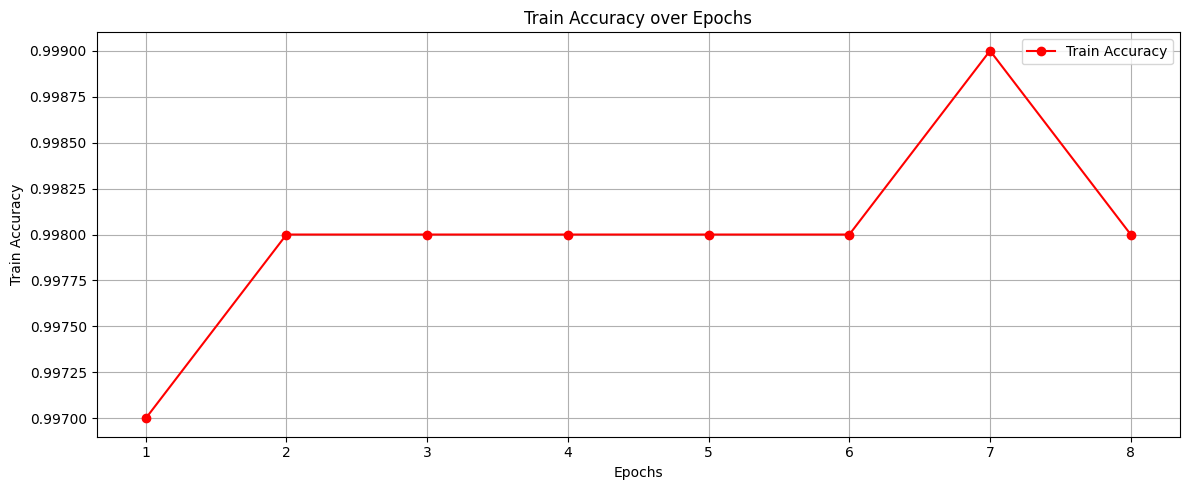

In [15]:
clc_fake.run()

Such good train-test split metrics are due to the following 'http'/'https' distribution:

In [32]:
df_ext = datasets['hispar'].reset_index(drop=True)
df_ext = remove_common_urls(df_ext, kaggle2019)

In [33]:
df_ext = remove_common_urls(df_ext, kaggle2019)

In [34]:
clc_fake.test(df_ext)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:27<00:00,  3.29it/s, accuracy=0.764, batch_idx=91]

Accuracy: 0.764
Precision: 0.684
Recall: 0.979
F1-Score: 0.806


As expected, when testing on *hispar* we obtain poor results.

___

# Hispar, ISCX, Ebbu on MyCLC, prep

In [ ]:
df_hispar = n_combiner(datasets, subset = ['hispar'], verbose=True, prep=True, pref=True, to_lower=False) 
print("")
df_ebbu = n_combiner(datasets, subset = ['ebbu'], verbose=True, prep=True, pref=True, to_lower=False)
print("------")
df_iscx = n_combiner(datasets, subset = ['iscx'], verbose=True, prep=True, pref=True, to_lower=False)

Starting merge for subset = ['hispar']
-----------------------------------------
N_initial = 92500
=> Found 258 URLs to discard.
N_final = 92242

Dataframe w/ subset ['hispar'] sucessfully built.

Starting merge for subset = ['ebbu']
---------------------------------------
N_initial = 73575
=> Found 21558 URLs to discard.
N_final = 52017

Dataframe w/ subset ['ebbu'] sucessfully built.
------
Starting merge for subset = ['iscx']
---------------------------------------
N_initial = 19965
=> Found 85 URLs to discard.
N_final = 19880

Dataframe w/ subset ['iscx'] sucessfully built.


### Run-1, train on hispar

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 46
cmap = {'L': 16, 'z': 5, '2': 37, '3': 33, '%': 30, '?': 19, '(': 15, 't': 71, 'Q': 13, 'S': 56, 'X': 6, 'j': 80, 'k': 73, '1': 29, 'h': 31, '/': 66, 'o': 70, 'D': 79, ')': 14, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 81, ',': 77, 'a': 39, 'A': 76, 'O': 53, 'g': 2, 'm': 50, 'W': 12, '7': 60, 'd': 68, '_': 23, '.': 54, 'E': 11, 'J': 75, 'l': 62, 'i': 8, 'G': 7, 'N': 26, '=': 42, '-': 24, '&': 38, '#': 18, 'q': 4, 's': 67, 'b': 9, 'I': 34, 'e': 63, 'p': 35, 'x': 49, 'B': 45, 'H': 22, 'U': 21, 'u': 69, '!': 20, 'P': 55, 'c': 72, '$': 3, '4': 78, 'M': 58, 'V': 27, 'K': 64, 'C': 44, 'n': 40, '6': 61, '0': 74, ':': 17, '5': 41, 'T': 59, 'v': 48, '@': 10, ';': 57, 'Y': 32, 'Z': 52, 'R': 25, 'F': 65, 'r': 51}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


-----------------------------------------------------------------------

Epoch [1/8]: 100%|██████████| 73/73 [00:30<00:00,  2.42it/s, batch_idx=73, loss=0.0818]


Epoch [1/8] completed with average loss: 0.2240
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  3.92it/s, accuracy=0.963, batch_idx=19]


Accuracy: 0.963
Precision: 0.987
Recall: 0.939
F1-Score: 0.962


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 73/73 [00:29<00:00,  2.51it/s, batch_idx=73, loss=0.0273]


Epoch [2/8] completed with average loss: 0.0891
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  4.03it/s, accuracy=0.98, batch_idx=19]


Accuracy: 0.98
Precision: 0.995
Recall: 0.965
F1-Score: 0.98


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 73/73 [00:29<00:00,  2.50it/s, batch_idx=73, loss=0.0362]


Epoch [3/8] completed with average loss: 0.0601
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  3.96it/s, accuracy=0.984, batch_idx=19]


Accuracy: 0.984
Precision: 0.997
Recall: 0.972
F1-Score: 0.984


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 73/73 [00:29<00:00,  2.50it/s, batch_idx=73, loss=0.0589]


Epoch [4/8] completed with average loss: 0.0497
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  3.99it/s, accuracy=0.987, batch_idx=19]


Accuracy: 0.987
Precision: 0.984
Recall: 0.99
F1-Score: 0.987


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 73/73 [00:29<00:00,  2.49it/s, batch_idx=73, loss=0.059] 


Epoch [5/8] completed with average loss: 0.0378
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.80it/s, accuracy=0.99, batch_idx=19] 


Accuracy: 0.99
Precision: 0.993
Recall: 0.988
F1-Score: 0.99


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 73/73 [00:29<00:00,  2.46it/s, batch_idx=73, loss=0.00522]


Epoch [6/8] completed with average loss: 0.0327
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.71it/s, accuracy=0.989, batch_idx=19]


Accuracy: 0.989
Precision: 0.998
Recall: 0.98
F1-Score: 0.989


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 73/73 [00:29<00:00,  2.44it/s, batch_idx=73, loss=0.00318]


Epoch [7/8] completed with average loss: 0.0239
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  3.99it/s, accuracy=0.989, batch_idx=19]


Accuracy: 0.989
Precision: 0.999
Recall: 0.978
F1-Score: 0.988


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 73/73 [00:30<00:00,  2.40it/s, batch_idx=73, loss=0.00946]


Epoch [8/8] completed with average loss: 0.0191
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:04<00:00,  3.86it/s, accuracy=0.992, batch_idx=19]

Accuracy: 0.992
Precision: 0.997
Recall: 0.987
F1-Score: 0.992

Finished. Training and Testing Complete!


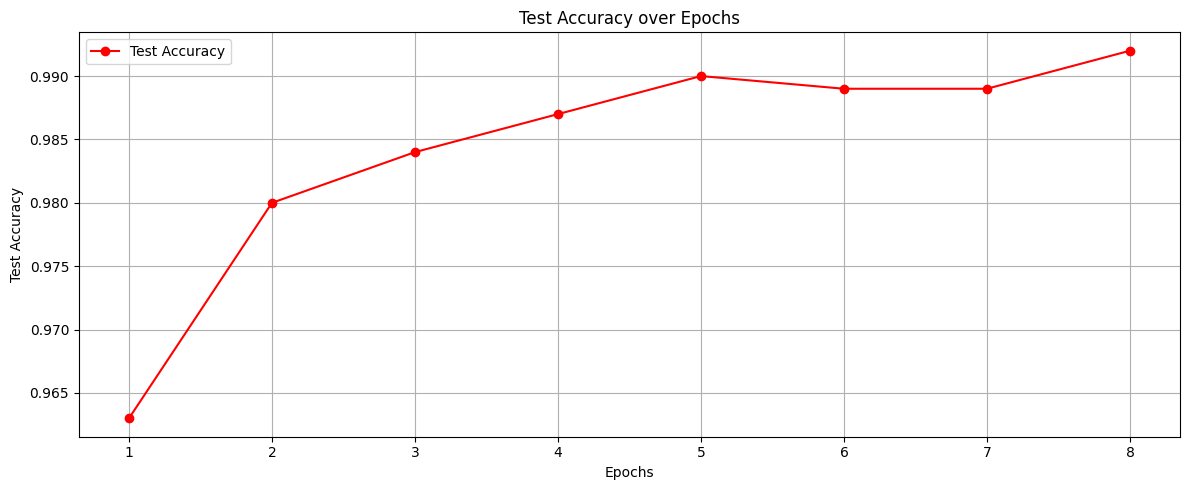

In [4]:
clc_h = MyCLC(df_hispar, num_epochs=8, split = True)
clc_h.run()

In [5]:
df_ebbu_no_hispar = remove_common_urls(df_ebbu, df_hispar)
df_iscx_no_hispar = remove_common_urls(df_iscx, df_hispar)

In [6]:
clc_h.test(df_ebbu_no_hispar)
print("\n-----------------------\n")
clc_h.test(df_iscx_no_hispar)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 51/51 [00:15<00:00,  3.31it/s, accuracy=0.825, batch_idx=51]


Accuracy: 0.825
Precision: 0.924
Recall: 0.642
F1-Score: 0.758

-----------------------

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s, accuracy=0.746, batch_idx=20]

Accuracy: 0.746
Precision: 0.811
Recall: 0.64
F1-Score: 0.716


# Run-2, train on iscx

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 9
cmap = {'L': 83, 'z': 16, '2': 5, '3': 37, '%': 33, '?': 30, '(': 19, 't': 15, 'Q': 71, 'S': 13, 'X': 56, 'j': 6, 'k': 81, '1': 74, 'h': 29, '/': 31, 'o': 66, 'D': 75, ')': 27, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 82, ' ': 78, ',': 39, 'a': 77, 'A': 53, 'O': 2, 'g': 50, 'm': 12, 'W': 62, '7': 69, '~': 23, 'd': 73, '_': 11, '.': 76, 'E': 49, 'J': 8, 'l': 7, 'i': 26, 'G': 44, 'N': 24, '=': 40, '-': 18, '&': 4, '#': 68, 'q': 9, 's': 42, 'b': 63, 'I': 48, 'e': 64, 'p': 60, 'x': 22, 'B': 21, 'U': 70, 'H': 20, 'u': 41, '!': 57, 'P': 80, 'c': 3, '4': 35, 'M': 61, 'V': 45, 'K': 58, 'C': 67, 'n': 25, '6': 72, '0': 38, ':': 52, '5': 79, 'T': 32, 'v': 65, '*': 10, '@': 55, ';': 14, 'Y': 34, 'Z': 54, 'R': 51, 'F': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


------------------------------------------------------

Epoch [1/8]: 100%|██████████| 16/16 [00:07<00:00,  2.01it/s, batch_idx=16, loss=0.415]


Epoch [1/8] completed with average loss: 0.6410
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s, accuracy=0.873, batch_idx=4]


Accuracy: 0.873
Precision: 0.8
Recall: 0.998
F1-Score: 0.888


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s, batch_idx=16, loss=0.183]


Epoch [2/8] completed with average loss: 0.2427
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s, accuracy=0.946, batch_idx=4]


Accuracy: 0.946
Precision: 0.962
Recall: 0.929
F1-Score: 0.945


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 16/16 [00:07<00:00,  2.00it/s, batch_idx=16, loss=0.0904]


Epoch [3/8] completed with average loss: 0.1132
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s, accuracy=0.979, batch_idx=4]


Accuracy: 0.979
Precision: 0.971
Recall: 0.989
F1-Score: 0.979


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s, batch_idx=16, loss=0.0449]


Epoch [4/8] completed with average loss: 0.0629
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s, accuracy=0.986, batch_idx=4]


Accuracy: 0.986
Precision: 0.984
Recall: 0.989
F1-Score: 0.986


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 16/16 [00:08<00:00,  1.99it/s, batch_idx=16, loss=0.0537]


Epoch [5/8] completed with average loss: 0.0403
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s, accuracy=0.989, batch_idx=4]


Accuracy: 0.989
Precision: 0.99
Recall: 0.989
F1-Score: 0.99


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 16/16 [00:07<00:00,  2.02it/s, batch_idx=16, loss=0.0334]


Epoch [6/8] completed with average loss: 0.0295
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s, accuracy=0.991, batch_idx=4]


Accuracy: 0.991
Precision: 0.994
Recall: 0.989
F1-Score: 0.991


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 16/16 [00:08<00:00,  1.97it/s, batch_idx=16, loss=0.0169]


Epoch [7/8] completed with average loss: 0.0211
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s, accuracy=0.994, batch_idx=4]


Accuracy: 0.994
Precision: 0.993
Recall: 0.995
F1-Score: 0.994


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 16/16 [00:07<00:00,  2.04it/s, batch_idx=16, loss=0.0134]


Epoch [8/8] completed with average loss: 0.0155
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s, accuracy=0.993, batch_idx=4]

Accuracy: 0.993
Precision: 0.995
Recall: 0.992
F1-Score: 0.993

Finished. Training and Testing Complete!


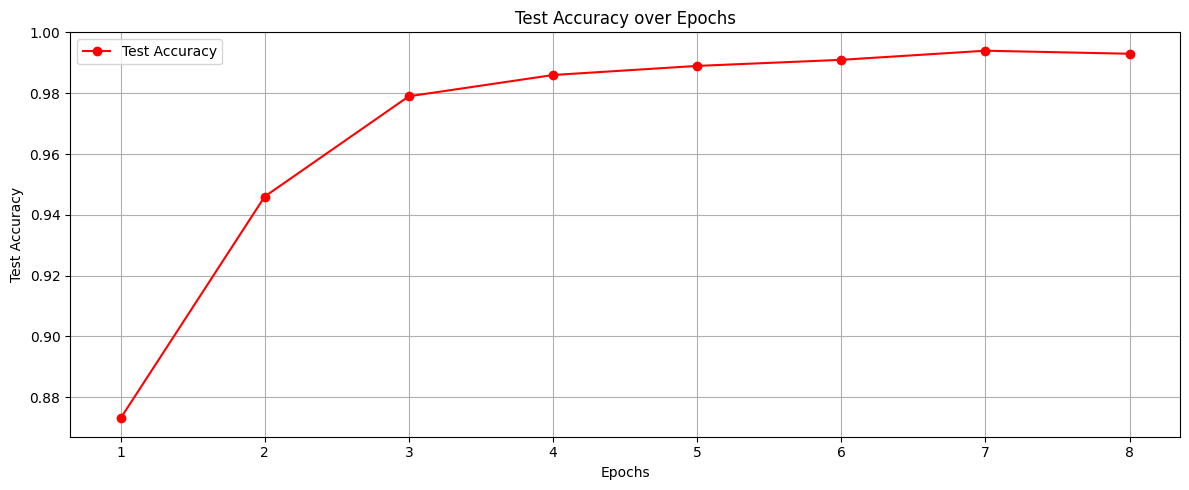

In [7]:
clc_i = MyCLC(df_iscx, num_epochs=8, split = True)
clc_i.run()

In [8]:
df_ebbu_no_iscx = remove_common_urls(df_ebbu, df_iscx)
df_hispar_no_iscx = remove_common_urls(df_hispar, df_iscx)

In [9]:
clc_i.test(df_ebbu_no_iscx)
print("\n-----------------------\n")
clc_i.test(df_hispar_no_iscx)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 51/51 [00:15<00:00,  3.24it/s, accuracy=0.699, batch_idx=51]


Accuracy: 0.699
Precision: 0.587
Recall: 0.975
F1-Score: 0.733

-----------------------

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:25<00:00,  3.54it/s, accuracy=0.564, batch_idx=91]

Accuracy: 0.564
Precision: 0.534
Recall: 0.983
F1-Score: 0.692


# Run-3, train on ebbu

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 26
cmap = {'L': 83, 'z': 16, '2': 5, '3': 37, '%': 33, '?': 30, '(': 19, 't': 15, 'Q': 71, 'S': 13, 'X': 56, 'j': 6, 'k': 81, '1': 74, 'h': 29, '/': 31, 'o': 66, 'D': 75, ')': 27, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 82, ',': 78, 'a': 39, 'A': 77, 'O': 53, 'g': 2, 'm': 50, 'W': 12, '7': 62, '~': 69, 'd': 23, '_': 73, '.': 11, 'E': 76, 'J': 49, 'l': 8, 'i': 7, 'G': 26, 'N': 44, '=': 24, '-': 40, '&': 18, '#': 4, 'q': 68, 's': 9, 'b': 42, 'I': 63, 'e': 48, 'p': 64, 'x': 60, 'B': 22, 'U': 21, 'H': 70, 'u': 20, '!': 41, 'P': 57, 'c': 80, '$': 3, '4': 35, 'M': 61, 'V': 45, 'K': 58, 'C': 67, 'n': 25, '6': 72, '0': 38, ':': 52, '5': 79, 'T': 32, 'v': 65, '*': 10, '@': 55, ';': 14, 'Y': 34, 'Z': 54, 'R': 51, 'F': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


-----------------------------------------------------

Epoch [1/8]: 100%|██████████| 41/41 [00:17<00:00,  2.34it/s, batch_idx=41, loss=0.252]


Epoch [1/8] completed with average loss: 0.5167
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.82it/s, accuracy=0.903, batch_idx=11]


Accuracy: 0.903
Precision: 0.888
Recall: 0.886
F1-Score: 0.887


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 41/41 [00:17<00:00,  2.29it/s, batch_idx=41, loss=0.172]


Epoch [2/8] completed with average loss: 0.1992
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.79it/s, accuracy=0.946, batch_idx=11]


Accuracy: 0.946
Precision: 0.946
Recall: 0.927
F1-Score: 0.936


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 41/41 [00:17<00:00,  2.29it/s, batch_idx=41, loss=0.127]


Epoch [3/8] completed with average loss: 0.1368
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.65it/s, accuracy=0.958, batch_idx=11]


Accuracy: 0.958
Precision: 0.957
Recall: 0.943
F1-Score: 0.95


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 41/41 [00:18<00:00,  2.28it/s, batch_idx=41, loss=0.0988]


Epoch [4/8] completed with average loss: 0.1056
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.51it/s, accuracy=0.965, batch_idx=11]


Accuracy: 0.965
Precision: 0.958
Recall: 0.959
F1-Score: 0.959


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 41/41 [00:17<00:00,  2.28it/s, batch_idx=41, loss=0.0974]


Epoch [5/8] completed with average loss: 0.0855
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.80it/s, accuracy=0.967, batch_idx=11]


Accuracy: 0.967
Precision: 0.958
Recall: 0.965
F1-Score: 0.962


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 41/41 [00:17<00:00,  2.31it/s, batch_idx=41, loss=0.0863]


Epoch [6/8] completed with average loss: 0.0678
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.83it/s, accuracy=0.967, batch_idx=11]


Accuracy: 0.967
Precision: 0.949
Recall: 0.976
F1-Score: 0.962


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 41/41 [00:17<00:00,  2.30it/s, batch_idx=41, loss=0.0536]


Epoch [7/8] completed with average loss: 0.0570
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.83it/s, accuracy=0.972, batch_idx=11]


Accuracy: 0.972
Precision: 0.966
Recall: 0.969
F1-Score: 0.967


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 41/41 [00:17<00:00,  2.34it/s, batch_idx=41, loss=0.0374]


Epoch [8/8] completed with average loss: 0.0464
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:02<00:00,  3.75it/s, accuracy=0.973, batch_idx=11]

Accuracy: 0.973
Precision: 0.966
Recall: 0.971
F1-Score: 0.969

Finished. Training and Testing Complete!


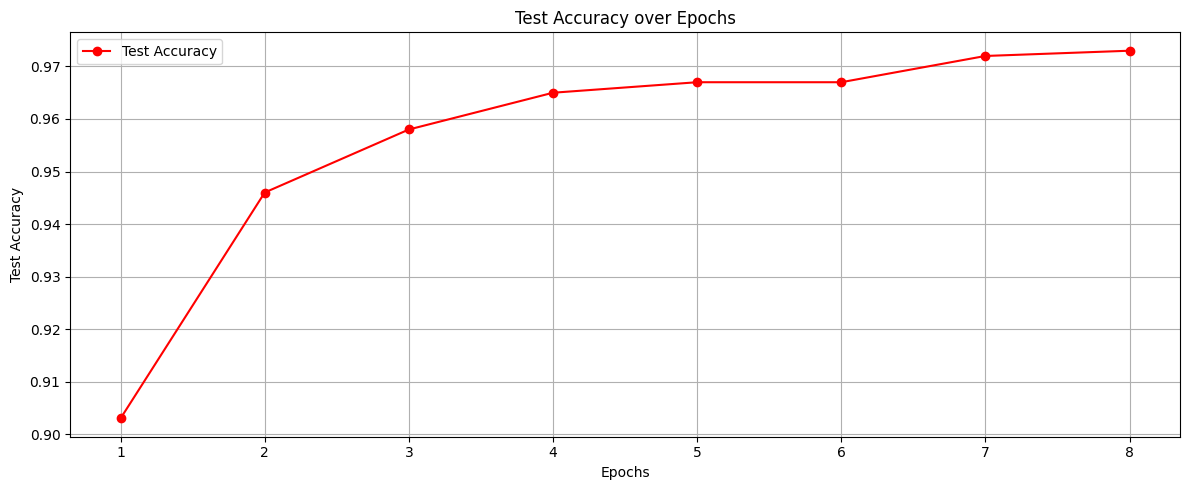

In [10]:
clc_e = MyCLC(df_ebbu, num_epochs=8, split = True)
clc_e.run()

In [11]:
df_iscx_no_ebbu = remove_common_urls(df_iscx, df_ebbu)
df_hispar_no_ebbu = remove_common_urls(df_hispar, df_ebbu)

In [12]:
clc_e.test(df_iscx_no_ebbu)
print("\n-----------------------\n")
clc_e.test(df_hispar_no_ebbu)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s, accuracy=0.871, batch_idx=20]


Accuracy: 0.871
Precision: 0.837
Recall: 0.92
F1-Score: 0.877

-----------------------

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:25<00:00,  3.53it/s, accuracy=0.896, batch_idx=91]

Accuracy: 0.896
Precision: 0.858
Recall: 0.948
F1-Score: 0.901


# Hispar, ISCX, Ebbu on MyCLC, no-prep

In [40]:
df_hispar = n_combiner(datasets, subset = ['hispar'], verbose=True, prep=False) 
print("")
df_ebbu = n_combiner(datasets, subset = ['ebbu'], verbose=True, prep=False)
print("------")
df_iscx = n_combiner(datasets, subset = ['iscx'], verbose=True, prep=False) #removes dup; ######prep = True MUCH MORE DISCARDED

Starting merge for subset = ['hispar']
-----------------------------------------
N_initial = 92500
=> Found 0 URLs to discard.
N_final = 92500

Dataframe w/ subset ['hispar'] sucessfully built.

Starting merge for subset = ['ebbu']
---------------------------------------
N_initial = 73575
=> Found 18812 URLs to discard.
N_final = 54763

Dataframe w/ subset ['ebbu'] sucessfully built.
------
Starting merge for subset = ['iscx']
---------------------------------------
N_initial = 19965
=> Found 9 URLs to discard.
N_final = 19956

Dataframe w/ subset ['iscx'] sucessfully built.


### Run 1, train on hispar

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 46
cmap = {'L': 16, 'z': 5, '2': 37, '3': 33, '%': 30, '?': 19, '(': 15, 't': 71, 'Q': 13, 'S': 56, 'X': 6, 'j': 80, 'k': 73, '1': 29, 'h': 31, '/': 66, 'o': 70, 'D': 79, ')': 14, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 81, ',': 77, 'a': 39, 'A': 76, 'O': 53, 'g': 2, 'm': 50, 'W': 12, '7': 60, 'd': 68, '_': 23, '.': 54, 'E': 11, 'J': 75, 'l': 62, 'i': 8, 'G': 7, 'N': 26, '=': 42, '-': 24, '&': 38, '#': 18, 'q': 4, 's': 67, 'b': 9, 'I': 34, 'e': 63, 'p': 35, 'x': 49, 'B': 45, 'U': 22, 'H': 21, 'u': 69, '!': 20, 'P': 55, 'c': 72, '$': 3, '4': 78, 'M': 58, 'V': 27, 'K': 64, 'C': 44, 'n': 40, '6': 61, '0': 74, ':': 17, '5': 41, 'T': 59, 'v': 48, '@': 10, ';': 57, 'Y': 32, 'Z': 52, 'R': 25, 'F': 65, 'r': 51}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


-----------------------------------------------------------------------

Epoch [1/6]: 100%|██████████| 73/73 [00:31<00:00,  2.28it/s, batch_idx=73, loss=0.137]


Epoch [1/6] completed with average loss: 0.2443
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.45it/s, accuracy=0.961, batch_idx=19]


Accuracy: 0.961
Precision: 0.986
Recall: 0.937
F1-Score: 0.961


--------------------------------------------------------------------------------------------




Epoch [2/6]: 100%|██████████| 73/73 [00:32<00:00,  2.22it/s, batch_idx=73, loss=0.117] 


Epoch [2/6] completed with average loss: 0.0903
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.42it/s, accuracy=0.98, batch_idx=19] 


Accuracy: 0.98
Precision: 0.995
Recall: 0.966
F1-Score: 0.98


--------------------------------------------------------------------------------------------




Epoch [3/6]: 100%|██████████| 73/73 [00:31<00:00,  2.28it/s, batch_idx=73, loss=0.0527]


Epoch [3/6] completed with average loss: 0.0589
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.44it/s, accuracy=0.984, batch_idx=19]


Accuracy: 0.984
Precision: 0.998
Recall: 0.969
F1-Score: 0.984


--------------------------------------------------------------------------------------------




Epoch [4/6]: 100%|██████████| 73/73 [00:31<00:00,  2.29it/s, batch_idx=73, loss=0.0264]


Epoch [4/6] completed with average loss: 0.0446
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.34it/s, accuracy=0.985, batch_idx=19]


Accuracy: 0.985
Precision: 0.999
Recall: 0.971
F1-Score: 0.984


--------------------------------------------------------------------------------------------




Epoch [5/6]: 100%|██████████| 73/73 [00:32<00:00,  2.28it/s, batch_idx=73, loss=0.0192]


Epoch [5/6] completed with average loss: 0.0335
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.39it/s, accuracy=0.991, batch_idx=19]


Accuracy: 0.991
Precision: 0.997
Recall: 0.985
F1-Score: 0.991


--------------------------------------------------------------------------------------------




Epoch [6/6]: 100%|██████████| 73/73 [00:31<00:00,  2.29it/s, batch_idx=73, loss=0.0314]


Epoch [6/6] completed with average loss: 0.0247
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 19/19 [00:05<00:00,  3.42it/s, accuracy=0.991, batch_idx=19]

Accuracy: 0.991
Precision: 0.998
Recall: 0.985
F1-Score: 0.991

Finished. Training and Testing Complete!


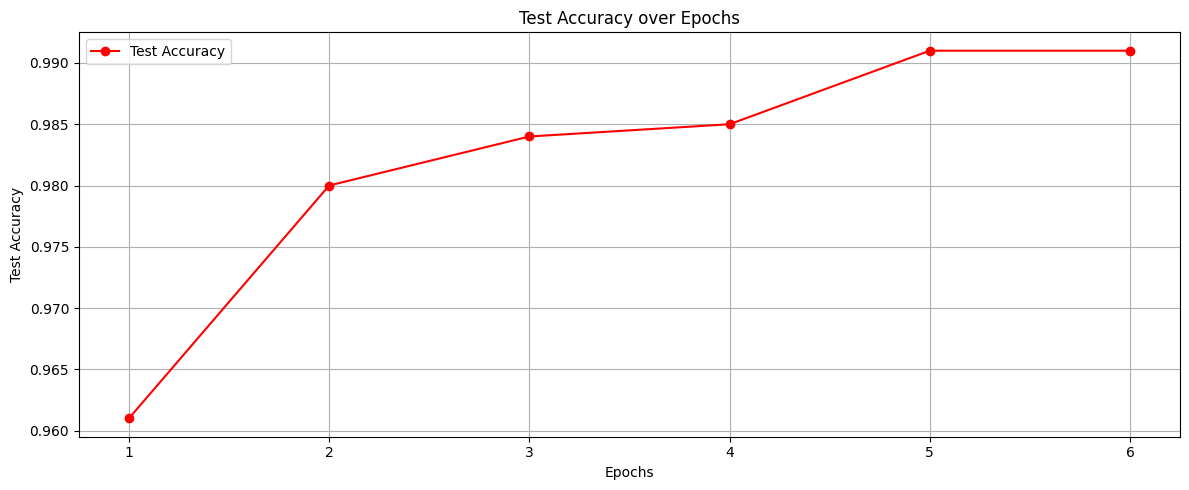

In [25]:
clc_h = MyCLC(df_hispar, num_epochs=6, split = True)
clc_h.run()

In [26]:
# df_ebbu_no_hispar = remove_common_urls(df_ebbu, df_hispar)
# df_iscx_no_hispar = remove_common_urls(df_iscx, df_hispar)

In [27]:
clc_h.test(df_ebbu_no_hispar)
clc_h.test(df_iscx_no_hispar)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, accuracy=0.82, batch_idx=54] 


Accuracy: 0.82
Precision: 0.931
Recall: 0.651
F1-Score: 0.767
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 20/20 [00:07<00:00,  2.59it/s, accuracy=0.717, batch_idx=20]

Accuracy: 0.717
Precision: 0.738
Recall: 0.672
F1-Score: 0.703


### Run 2, train on iscx

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 9
cmap = {'L': 83, 'z': 16, '2': 5, '3': 37, '%': 33, '?': 30, '(': 19, 't': 15, 'Q': 71, 'S': 13, 'X': 56, 'j': 6, 'k': 81, '1': 74, 'h': 29, '/': 31, 'o': 66, 'D': 75, ')': 27, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 82, ' ': 78, ',': 39, 'a': 77, 'A': 53, 'O': 2, 'g': 50, 'm': 12, 'W': 62, '7': 69, '~': 23, 'd': 73, '_': 11, '.': 76, 'E': 49, 'J': 8, 'l': 7, 'i': 26, 'G': 44, 'N': 24, '=': 40, '-': 18, '&': 4, '#': 68, 'q': 9, 's': 42, 'b': 63, 'I': 48, 'e': 64, 'p': 60, 'x': 22, 'B': 21, 'H': 70, 'U': 20, 'u': 41, '!': 57, 'P': 80, 'c': 3, '4': 35, 'M': 61, 'V': 45, 'K': 58, 'C': 67, 'n': 25, '6': 72, '0': 38, ':': 52, '5': 79, 'T': 32, 'v': 65, '*': 10, '@': 55, ';': 14, 'Y': 34, 'Z': 54, 'R': 51, 'F': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


------------------------------------------------------

Epoch [1/5]: 100%|██████████| 16/16 [00:08<00:00,  1.94it/s, batch_idx=16, loss=0.25] 


Epoch [1/5] completed with average loss: 0.5236
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s, accuracy=0.944, batch_idx=4]


Accuracy: 0.944
Precision: 0.951
Recall: 0.936
F1-Score: 0.943


--------------------------------------------------------------------------------------------




Epoch [2/5]: 100%|██████████| 16/16 [00:08<00:00,  1.96it/s, batch_idx=16, loss=0.112] 


Epoch [2/5] completed with average loss: 0.1500
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s, accuracy=0.973, batch_idx=4]


Accuracy: 0.973
Precision: 0.966
Recall: 0.981
F1-Score: 0.973


--------------------------------------------------------------------------------------------




Epoch [3/5]: 100%|██████████| 16/16 [00:08<00:00,  1.96it/s, batch_idx=16, loss=0.0563]


Epoch [3/5] completed with average loss: 0.0692
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s, accuracy=0.989, batch_idx=4]


Accuracy: 0.989
Precision: 0.99
Recall: 0.989
F1-Score: 0.989


--------------------------------------------------------------------------------------------




Epoch [4/5]: 100%|██████████| 16/16 [00:08<00:00,  1.94it/s, batch_idx=16, loss=0.0346]


Epoch [4/5] completed with average loss: 0.0394
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s, accuracy=0.993, batch_idx=4]


Accuracy: 0.993
Precision: 0.993
Recall: 0.993
F1-Score: 0.993


--------------------------------------------------------------------------------------------




Epoch [5/5]: 100%|██████████| 16/16 [00:08<00:00,  1.95it/s, batch_idx=16, loss=0.0289]


Epoch [5/5] completed with average loss: 0.0276
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s, accuracy=0.994, batch_idx=4]

Accuracy: 0.994
Precision: 0.996
Recall: 0.993
F1-Score: 0.994

Finished. Training and Testing Complete!


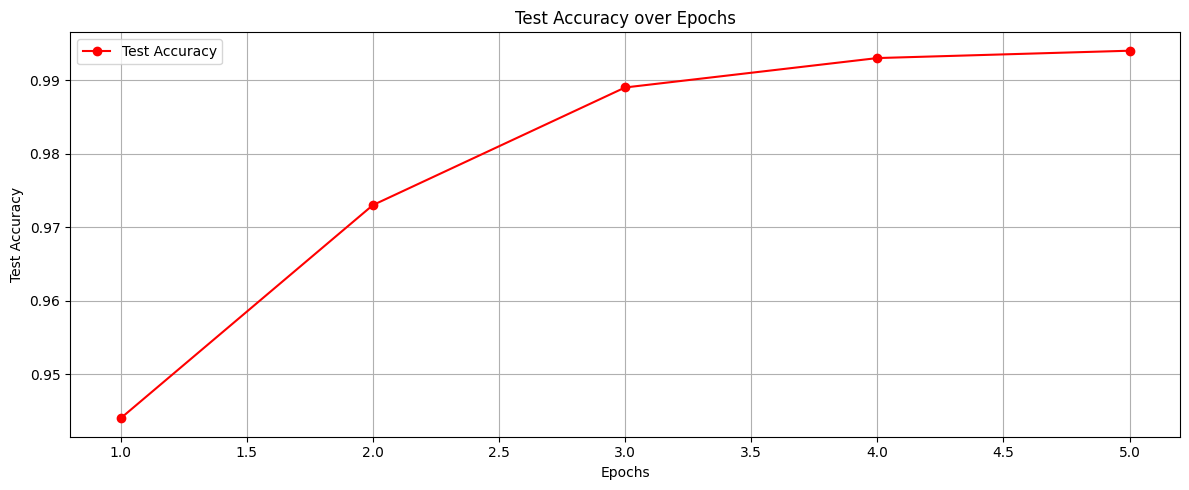

In [28]:
clc_i = MyCLC(df_iscx, num_epochs=5, split = True)
clc_i.run()

In [29]:
# df_ebbu_no_iscx = remove_common_urls(df_ebbu, df_iscx)
# df_hispar_no_iscx = remove_common_urls(df_hispar, df_iscx)

In [30]:
clc_i.test(df_ebbu_no_iscx)
clc_i.test(df_hispar_no_iscx)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 54/54 [00:17<00:00,  3.04it/s, accuracy=0.575, batch_idx=54]


Accuracy: 0.575
Precision: 0.517
Recall: 0.948
F1-Score: 0.669
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:28<00:00,  3.22it/s, accuracy=0.545, batch_idx=91]

Accuracy: 0.545
Precision: 0.524
Recall: 0.974
F1-Score: 0.682


### Run 3, train on ebbu

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 27
cmap = {'L': 83, 'z': 16, '2': 5, '3': 37, '%': 33, '?': 30, '(': 19, 't': 15, 'Q': 71, 'S': 13, 'X': 56, 'j': 6, 'k': 81, '1': 74, 'h': 29, '/': 31, 'o': 66, 'D': 75, ')': 27, 'y': 47, '+': 43, '8': 46, '9': 36, 'f': 28, 'w': 82, ',': 78, 'a': 39, 'A': 77, 'O': 53, 'g': 2, 'm': 50, 'W': 12, '7': 62, '~': 69, 'd': 23, '_': 73, '.': 11, 'E': 76, 'J': 49, 'l': 8, 'i': 7, 'G': 26, 'N': 44, '=': 24, '-': 40, '&': 18, '#': 4, 'q': 68, 's': 9, 'b': 42, 'I': 63, 'e': 48, 'p': 64, 'x': 60, 'B': 22, 'H': 21, 'U': 70, 'u': 20, '!': 41, 'P': 57, 'c': 80, '$': 3, '4': 35, 'M': 61, 'V': 45, 'K': 58, 'C': 67, 'n': 25, '6': 72, '0': 38, ':': 52, '5': 79, 'T': 32, 'v': 65, '*': 10, '@': 55, ';': 14, 'Y': 34, 'Z': 54, 'R': 51, 'F': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 data loaders.


-----------------------------------------------------

Epoch [1/8]: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s, batch_idx=43, loss=0.246]


Epoch [1/8] completed with average loss: 0.4933
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s, accuracy=0.912, batch_idx=11]


Accuracy: 0.912
Precision: 0.897
Recall: 0.911
F1-Score: 0.904


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 43/43 [00:20<00:00,  2.10it/s, batch_idx=43, loss=0.18] 


Epoch [2/8] completed with average loss: 0.1780
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s, accuracy=0.953, batch_idx=11]


Accuracy: 0.953
Precision: 0.952
Recall: 0.943
F1-Score: 0.948


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 43/43 [00:20<00:00,  2.11it/s, batch_idx=43, loss=0.111] 


Epoch [3/8] completed with average loss: 0.1230
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.09it/s, accuracy=0.964, batch_idx=11]


Accuracy: 0.964
Precision: 0.967
Recall: 0.953
F1-Score: 0.96


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 43/43 [00:20<00:00,  2.10it/s, batch_idx=43, loss=0.0796]


Epoch [4/8] completed with average loss: 0.0976
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s, accuracy=0.969, batch_idx=11]


Accuracy: 0.969
Precision: 0.958
Recall: 0.975
F1-Score: 0.966


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 43/43 [00:19<00:00,  2.18it/s, batch_idx=43, loss=0.0815]


Epoch [5/8] completed with average loss: 0.0798
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s, accuracy=0.973, batch_idx=11]


Accuracy: 0.973
Precision: 0.976
Recall: 0.964
F1-Score: 0.97


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s, batch_idx=43, loss=0.0753]


Epoch [6/8] completed with average loss: 0.0642
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s, accuracy=0.976, batch_idx=11]


Accuracy: 0.976
Precision: 0.97
Recall: 0.978
F1-Score: 0.974


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 43/43 [00:19<00:00,  2.19it/s, batch_idx=43, loss=0.033] 


Epoch [7/8] completed with average loss: 0.0501
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.30it/s, accuracy=0.977, batch_idx=11]


Accuracy: 0.977
Precision: 0.981
Recall: 0.968
F1-Score: 0.975


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 43/43 [00:19<00:00,  2.18it/s, batch_idx=43, loss=0.0585]


Epoch [8/8] completed with average loss: 0.0426
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 11/11 [00:03<00:00,  3.25it/s, accuracy=0.979, batch_idx=11]

Accuracy: 0.979
Precision: 0.974
Recall: 0.981
F1-Score: 0.977

Finished. Training and Testing Complete!


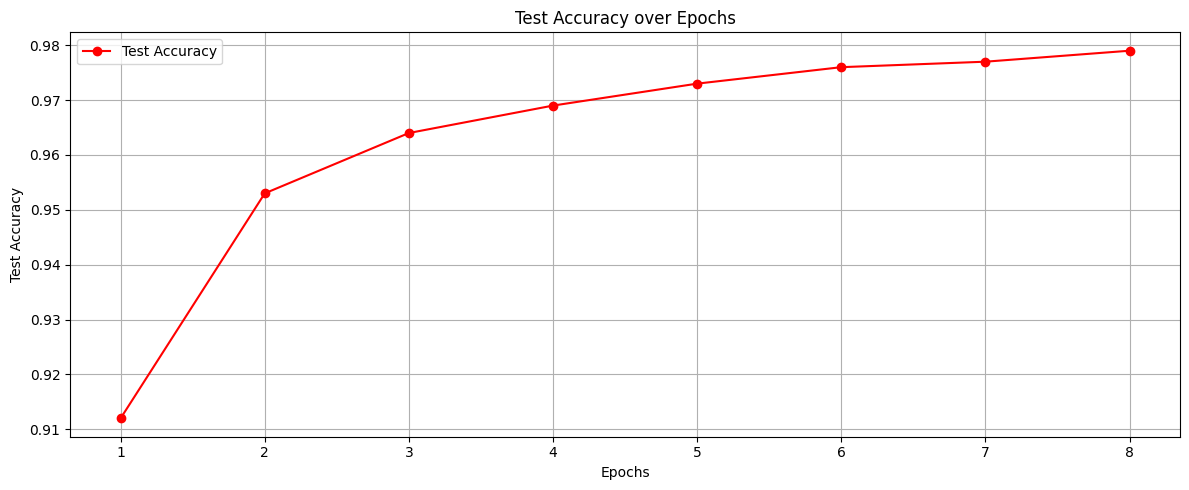

In [32]:
clc_e = MyCLC(df_ebbu, num_epochs=8, split = True)
clc_e.run()

In [33]:
# df_iscx_no_ebbu = remove_common_urls(df_iscx, df_ebbu)
# df_hispar_no_ebbu = remove_common_urls(df_hispar, df_ebbu)

In [31]:
clc_e.test(df_iscx_no_ebbu)
print("\n-----------------------\n")
clc_e.test(df_hispar_no_ebbu)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 20/20 [00:07<00:00,  2.58it/s, accuracy=0.864, batch_idx=20]


Accuracy: 0.864
Precision: 0.825
Recall: 0.924
F1-Score: 0.871

-----------------------

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:28<00:00,  3.21it/s, accuracy=0.908, batch_idx=91]

Accuracy: 0.908
Precision: 0.935
Recall: 0.878
F1-Score: 0.905


| Train          | Preprocessing | Testing Accuracy | Hispar F1       | Ebbu F1            | ISCX F1            |
|----------------|---------------|------------------|-----------------|--------------------|--------------------|
| HISPAR         | False         | 0.990            | -----           | 0.767              | 0.703              |
| EBBU           | False         | 0.980            | 0.905           | -----              | 0.871              |
| ISCX           | False         | 0.990            | 0.682           | 0.669              | -----              |


# CLC Entry, EXACT Data:

In [4]:
##############
### HISPAR ###
##############

hispar_train = pd.read_csv('hispar/hp_train.csv')
hispar_test = pd.read_csv('hispar/hp_test.csv')
hispar_val = pd.read_csv('hispar/hp_valid.csv')

#hispar = pd.concat([hispar_train, hispar_test, hispar_val])
hispar_train = hispar_train.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
hispar_train = hispar_train.rename(columns={'label': 'status'})
print("HISPAR_Train sucessfully loaded!")

hispar_test = hispar_test.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
hispar_test = hispar_test.rename(columns={'label': 'status'})
print("HISPAR_Test sucessfully loaded!")

hispar_val = hispar_val.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
hispar_val = hispar_val.rename(columns={'label': 'status'})
print("HISPAR_Validation sucessfully loaded!\n")

##############
#### ISCX ####
##############

iscx_train = pd.read_csv('iscx_url/iscx_train.csv')
iscx_test = pd.read_csv('iscx_url/iscx_test.csv')
iscx_val = pd.read_csv('iscx_url/iscx_valid.csv')


#hispar = pd.concat([hispar_train, hispar_test, hispar_val])

iscx_train = iscx_train.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
iscx_train = iscx_train.rename(columns={'label': 'status'})
print("ISCX_Train sucessfully loaded!")

iscx_test = iscx_test.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
iscx_test = iscx_test.rename(columns={'label': 'status'})
print("ISCX_Test sucessfully loaded!")

iscx_val = iscx_val.drop(columns=['Unnamed: 0.1', 'index', 'Unnamed: 0'])
iscx_val = iscx_val.rename(columns={'label': 'status'})
print("ISCX_Validation sucessfully loaded!\n")


##############
#### EBBU ####
##############

path_base = 'sahingoz_url/'
path_legit = path_base + 'sahingoz_legitimate_36400.json'
path_phish = path_base + 'sahingoz_phishing_37175.json'
with open(path_legit, 'r') as file:
    sh_legit = json.load(file)
    for i,el in enumerate(sh_legit):
        sh_legit[i] = [el,0]
    urls_0 = pd.DataFrame(sh_legit, columns=['url', 'status'])

with open(path_phish, 'r') as file:
    sh_phish = json.load(file)
    for i,el in enumerate(sh_phish):
        sh_phish[i] = [el,1]
    urls_1 = pd.DataFrame(sh_phish, columns=['url','status'])

ebbu = pd.concat([urls_0, urls_1], ignore_index=True)

#shuffle final result
ebbu = sklearn.utils.shuffle(ebbu, random_state=42)  
ebbu = ebbu.reset_index(drop = True)

ebbu_train, ebbu_test = train_test_split(ebbu, test_size=0.2, random_state=42)
ebbu_train = ebbu_train.reset_index(drop=True)
ebbu_test = ebbu_test.reset_index(drop=True)

print("EBBU2017_Train sucessfully loaded!")
print("EBBU2017_Test sucessfully loaded!")

HISPAR_Train sucessfully loaded!
HISPAR_Test sucessfully loaded!
HISPAR_Validation sucessfully loaded!

ISCX_Train sucessfully loaded!
ISCX_Test sucessfully loaded!
ISCX_Validation sucessfully loaded!

EBBU2017_Train sucessfully loaded!
EBBU2017_Test sucessfully loaded!


### Train with ISCX, test on Both:

In [4]:
raw_clc_iscx = MyCLC(iscx_train, prep=False, num_epochs=8, split=False)

In [5]:
raw_clc_iscx.run()

Generating character map.
frequency_threshold = 7
cmap = {'L': 83, 'd': 16, 'E': 5, 'Z': 37, '2': 33, 'g': 30, 'I': 19, 'G': 15, 'o': 71, '&': 13, ')': 56, ':': 6, 'P': 81, '7': 74, 'v': 29, 'p': 31, 'h': 66, 'Q': 75, '/': 27, 'e': 47, '4': 43, 'f': 46, 's': 36, 'u': 28, '5': 82, ';': 78, '!': 39, 'X': 77, 'J': 53, '6': 2, 'T': 50, '9': 12, '-': 62, '#': 69, ',': 23, '?': 73, 't': 11, 'H': 76, '0': 49, 'S': 8, 'O': 7, '~': 26, '=': 44, '8': 24, '1': 40, '(': 18, '+': 4, 'Y': 68, 'y': 9, 'm': 42, 'D': 63, '.': 48, 'U': 64, 'n': 60, 'B': 22, 'c': 21, 'N': 70, ' ': 20, 'q': 41, 'l': 57, 'z': 80, 'i': 3, '%': 35, 'K': 61, 'b': 45, 'W': 58, '@': 67, 'k': 25, 'A': 72, '_': 38, 'C': 52, 'M': 79, 'F': 32, '3': 65, '*': 10, 'j': 55, 'V': 14, 'x': 34, 'a': 54, 'w': 51, 'R': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 1 Data Loaders.


-----------------------------------------------------------------------------------------


Device cuda is available. Init

Epoch [1/8]: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s, batch_idx=12, loss=0.276]


Epoch [1/8] completed with average loss: 0.5291
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s, batch_idx=12, loss=0.106]


Epoch [2/8] completed with average loss: 0.1664
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s, batch_idx=12, loss=0.0584]


Epoch [3/8] completed with average loss: 0.0837
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s, batch_idx=12, loss=0.0335]


Epoch [4/8] completed with average loss: 0.0482
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s, batch_idx=12, loss=0.0331]


Epoch [5/8] completed with average loss: 0.0343
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s, batch_idx=12, loss=0.0159]


Epoch [6/8] completed with average loss: 0.0236
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s, batch_idx=12, loss=0.0149] 


Epoch [7/8] completed with average loss: 0.0169
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s, batch_idx=12, loss=0.0133]

Epoch [8/8] completed with average loss: 0.0138
_____________________________________________________________


Training Complete!
No plots to show, no train-test split.


In [13]:
raw_clc_iscx.test(iscx_test)
raw_clc_iscx.test(ebbu_test)
raw_clc_iscx.test(hispar_test)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s, accuracy=0.994, batch_idx=4]


Accuracy: 0.994
Precision: 0.993
Recall: 0.996
F1-Score: 0.994
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 15/15 [00:05<00:00,  2.55it/s, accuracy=0.604, batch_idx=15]


Accuracy: 0.604
Precision: 0.563
Recall: 0.981
F1-Score: 0.715
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:06<00:00,  2.97it/s, accuracy=0.528, batch_idx=19]

Accuracy: 0.528
Precision: 0.513
Recall: 0.978
F1-Score: 0.673


### Train with EBBU, test on Both:

In [26]:
raw_clc_ebbu = MyCLC(ebbu_train, prep=False, num_epochs=8, split=False)

In [27]:
raw_clc_ebbu.run()

Generating character map.
frequency_threshold = 36
cmap = {'C': 83, 'm': 16, '?': 5, '~': 37, 'X': 33, 'G': 30, '5': 19, 'U': 15, 'q': 71, 'j': 13, '!': 56, 'a': 6, '2': 81, 'D': 74, 'K': 29, '(': 31, 'E': 66, '1': 75, 'r': 27, 'v': 47, 'H': 43, 'l': 46, ':': 36, '&': 28, 'p': 82, 'd': 78, 'Z': 39, 'w': 77, 'F': 53, 'u': 2, '#': 50, ';': 12, '/': 62, 'y': 69, 'o': 23, ')': 73, 'i': 11, 'P': 76, '*': 49, 'Q': 8, '%': 7, 'x': 26, 'Y': 44, 'g': 24, 'N': 40, ',': 18, 'A': 4, '=': 68, 'S': 9, 'W': 42, 'I': 63, 'O': 48, '9': 64, '0': 60, 'k': 22, '4': 21, '.': 70, 'b': 20, 'M': 41, 'h': 57, 'V': 80, 'R': 3, 'z': 35, 'n': 61, 'T': 45, 'e': 58, 'L': 67, '3': 25, '$': 72, '6': 38, 'B': 52, 'J': 79, 'c': 32, '-': 65, '7': 10, 'f': 55, 's': 14, '8': 34, '_': 54, 't': 51, '@': 17, '+': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 1 Data Loaders.


-----------------------------------------------------------------------------------------


Device cuda is available. Ini

Epoch [1/8]: 100%|██████████| 58/58 [00:26<00:00,  2.16it/s, batch_idx=58, loss=0.191]


Epoch [1/8] completed with average loss: 0.3987
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 58/58 [00:26<00:00,  2.18it/s, batch_idx=58, loss=0.143]


Epoch [2/8] completed with average loss: 0.1328
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 58/58 [00:26<00:00,  2.23it/s, batch_idx=58, loss=0.08]  


Epoch [3/8] completed with average loss: 0.0916
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 58/58 [00:26<00:00,  2.18it/s, batch_idx=58, loss=0.0709]


Epoch [4/8] completed with average loss: 0.0667
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 58/58 [00:27<00:00,  2.12it/s, batch_idx=58, loss=0.0669]


Epoch [5/8] completed with average loss: 0.0496
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 58/58 [00:27<00:00,  2.13it/s, batch_idx=58, loss=0.0322]


Epoch [6/8] completed with average loss: 0.0393
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 58/58 [00:27<00:00,  2.08it/s, batch_idx=58, loss=0.0261]


Epoch [7/8] completed with average loss: 0.0315
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 58/58 [00:27<00:00,  2.14it/s, batch_idx=58, loss=0.0165]

Epoch [8/8] completed with average loss: 0.0261
_____________________________________________________________


Training Complete!
No plots to show, no train-test split.


In [3]:
hisp = datasets['hispar']

In [36]:
raw_clc_ebbu.test(iscx_test)
raw_clc_ebbu.test(ebbu_test)
raw_clc_ebbu.test(hisp.reset_index(drop=True))
f1_weird = raw_clc_ebbu.test(hisp.reset_index(drop=True), return_metrics=True)[3]
print(f1_weird)

Device cuda is available. Initialising evaluation:


External Dataset:   0%|          | 0/4 [00:00<?, ?it/s]

External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s, accuracy=0.866, batch_idx=4]


Accuracy: 0.866
Precision: 0.817
Recall: 0.948
F1-Score: 0.877
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s, accuracy=0.986, batch_idx=15]


Accuracy: 0.986
Precision: 0.981
Recall: 0.992
F1-Score: 0.987
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:28<00:00,  3.15it/s, accuracy=0.909, batch_idx=91]


Accuracy: 0.909
Precision: 0.916
Recall: 0.902
F1-Score: 0.909
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:28<00:00,  3.14it/s, accuracy=0.909, batch_idx=91]


Accuracy: 0.909
Precision: 0.916
Recall: 0.902
F1-Score: 0.909
0.909


### Train with HISPAR, test on Both:

In [10]:
raw_clc_hispar = MyCLC(hispar_train, prep=False, num_epochs=8, split=False)

In [11]:
raw_clc_hispar.run()

Generating character map.
frequency_threshold = 34
cmap = {'L': 16, 'd': 5, 'E': 37, 'Z': 33, '2': 30, 'g': 19, 'I': 15, 'G': 71, 'o': 13, '&': 56, ')': 6, ':': 81, 'P': 74, '7': 29, 'v': 31, 'p': 66, 'h': 75, 'Q': 27, '/': 47, 'f': 43, 'e': 46, '4': 36, 's': 28, 'u': 82, '5': 78, ';': 39, '!': 77, 'X': 53, 'J': 2, '6': 50, 'T': 12, '9': 62, '-': 69, '#': 23, ',': 73, '?': 11, 't': 76, 'H': 49, '0': 8, 'S': 7, 'O': 26, '~': 44, '=': 24, '8': 40, '1': 18, '(': 4, '+': 68, 'Y': 9, 'y': 42, 'm': 63, 'D': 48, '.': 64, 'U': 60, 'n': 22, 'B': 21, 'c': 70, '$': 20, 'N': 41, 'q': 57, 'l': 80, 'z': 3, 'i': 35, '%': 61, 'K': 45, 'b': 58, 'W': 67, '@': 25, 'k': 72, 'A': 38, '_': 52, 'C': 79, 'M': 32, 'F': 65, '3': 10, 'j': 55, 'V': 14, 'x': 34, 'a': 54, 'w': 51, 'R': 17, 'r': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 1 Data Loaders.


-----------------------------------------------------------------------------------------


Device cuda is available. Initialising

Epoch [1/8]: 100%|██████████| 55/55 [00:25<00:00,  2.16it/s, batch_idx=55, loss=0.153]


Epoch [1/8] completed with average loss: 0.2690
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 55/55 [00:25<00:00,  2.19it/s, batch_idx=55, loss=0.0615]


Epoch [2/8] completed with average loss: 0.1053
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 55/55 [00:24<00:00,  2.20it/s, batch_idx=55, loss=0.0229]


Epoch [3/8] completed with average loss: 0.0675
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 55/55 [00:25<00:00,  2.20it/s, batch_idx=55, loss=0.0329]


Epoch [4/8] completed with average loss: 0.0497
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 55/55 [00:25<00:00,  2.19it/s, batch_idx=55, loss=0.0359]


Epoch [5/8] completed with average loss: 0.0371
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 55/55 [00:25<00:00,  2.19it/s, batch_idx=55, loss=0.0226]


Epoch [6/8] completed with average loss: 0.0292
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 55/55 [00:35<00:00,  1.57it/s, batch_idx=55, loss=0.022] 


Epoch [7/8] completed with average loss: 0.0238
_____________________________________________________________



--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 55/55 [00:38<00:00,  1.45it/s, batch_idx=55, loss=0.0427]

Epoch [8/8] completed with average loss: 0.0198
_____________________________________________________________


Training Complete!
No plots to show, no train-test split.


In [15]:
raw_clc_hispar.test(iscx_test)
raw_clc_hispar.test(ebbu_test)
raw_clc_hispar.test(hispar_test)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s, accuracy=0.694, batch_idx=4]


Accuracy: 0.694
Precision: 0.682
Recall: 0.737
F1-Score: 0.709
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 15/15 [00:05<00:00,  2.55it/s, accuracy=0.833, batch_idx=15]


Accuracy: 0.833
Precision: 0.935
Recall: 0.721
F1-Score: 0.814
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:07<00:00,  2.60it/s, accuracy=0.992, batch_idx=19]

Accuracy: 0.992
Precision: 0.995
Recall: 0.988
F1-Score: 0.992


| Train/Test     | ISCX F1         | Ebbu F1            | HISPAR F1          |
|----------------|-----------------|--------------------|--------------------|
| ISCX           | **1**           | 0.72               | 0.67               |
| EBBU           | 0.88            | **0.98**           | 0.91               |
| HISPAR         | 0.71            | 0.81               | **0.99**           |

| Train: ISCX      | ISCX F1         | EBBU F1           | HP F1             |
|------------------|-----------------|-------------------|-------------------|
|        URLNet    | **0.99**        | 0.69              | 0.68              |
|        URLTran   | **0.99**        | 0.68              | 0.67              |
|        CatchPhish| **0.99**        | 0.68              | 0.69              |
|        PhishRF   | **1**           | 0.68              | 0.67              |
|        MyCLC     | **1**           | 0.72              | 0.67              |


| Train: EBBU      | ISCX F1         | EBBU F1           | HP F1             |
|------------------|-----------------|-------------------|-------------------|
|        URLNet    | 0.88            | **0.98**          | 0.92              |
|        URLTran   | 0.83            | **0.99**          | 0.93              |
|        CatchPhish| 0.80            | **0.94**          | 0.88              |
|        PhishRF   | 0.87            | **0.96**          | 0.94              |
|        MyCLC     | 0.88            | **0.98**          | 0.91              |

| Train: HP        | ISCX F1         | EBBU F1           | HP F1             |
|------------------|-----------------|-------------------|-------------------|
|      URLNet      | 0.72            | 0.79              | **0.99**          |
|      URLTran     | 0.75            | 0.86              | **0.99**          |
|      CatchPhish  | 0.73            | 0.72              | **0.98**          |
|      PhishRF     | 0.83            | 0.86              | **0.99**          |
|      MyCLC       | 0.71            | 0.81              | **0.99**          |

## Table CLC vs. URLNet 3-Fold (4s+2020+LBL)

| Train: ISCX      | Prefix Removal        | Test Acc           | ISCX               | EBBU F1 |  Hispar F1 |
|------------------|-----------------------|--------------------|--------------------|---------|------------|
|        URLNet    | False                 |    0.992           |     0.90           |   0.98  |    0.84    | 
|        CLC       | False                 |    0.976            |   0.89             |  0.97   |  0.84      |





## destroy dups important

In [8]:
import pandas as pd

def destroy_DC(df, verbose=False):
    """
    Remove all rows corresponding to any URL that occurs more than once in the dataframe.
    
    Parameters:
        df (pd.DataFrame): DataFrame with at least a 'url' column.
        verbose (bool): If True, print out the list of duplicate URLs that will be removed.
        
    Returns:
        pd.DataFrame: A copy of df with ALL duplicate URLs removed.
    """
    # Count occurrences of each URL
    url_counts = df['url'].value_counts()
    
    # Identify URLs that appear more than once
    duplicate_urls = url_counts[url_counts > 1].index.tolist()
    
    if verbose:
        print("Found duplicate URLs (to be removed):")
        for url in duplicate_urls:
            print(f" - {url}")
    
    # Remove any row whose URL is in the list of duplicate URLs
    df_cleaned = df[~df['url'].isin(duplicate_urls)].copy()
    
    return df_cleaned


In [ ]:
datasets = buildDataframes(source=True)

print("\n----------------------------------------")
#prep: no prefix, internal dc removal:
for i,dataset_name in enumerate(datasets.keys()):
    dataset_i = datasets[dataset_name]
    print(f"dataset_{i}: {dataset_name}")
    dataset_i_ndc = preprocess_df(dataset_i) #remove prefixes (https, ...)
    dataset_i_ndc = discarder(dataset_i_ndc,verbose=True) # remove internal duplicates & conflicts
    datasets[dataset_name] = dataset_i
    print("")
    print("Prep + N-DC completed.")
    if i!=len(datasets)-1: print("----------------------------------------")

Kaggle4S sucessfully loaded!
Kaggle2020 sucessfully loaded!
Kaggle2019 sucessfully loaded!
Kaggle2021 sucessfully loaded!
Look Before Leap data sucessfully loaded!
EBBU2017 sucessfully loaded!
HISPAR sucessfully loaded!
ISCX-URL2016 sucessfully loaded!

----------------------------------------
dataset_0: kaggle4s
There were 27227 duplicates/conflicts removed.

Prep + N-DC completed.
----------------------------------------
dataset_1: kaggle2019
There were 7009 duplicates/conflicts removed.

Prep + N-DC completed.
----------------------------------------
dataset_2: kaggle2020
There were 42935 duplicates/conflicts removed.

Prep + N-DC completed.
----------------------------------------
dataset_3: kaggle2021
There were 11804 duplicates/conflicts removed.

Prep + N-DC completed.
----------------------------------------
dataset_4: lbl
There were 1774 duplicates/conflicts removed.

Prep + N-DC completed.
----------------------------------------
dataset_5: ebbu
There were 21558 duplicates/co

Initialing training for kaggle4s, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 2
cmap = {'X': 83, '-': 16, '~': 5, 'M': 37, 'd': 33, '(': 30, 'k': 19, '5': 15, 'p': 71, 'Y': 13, '&': 56, 'W': 6, '+': 84, 'n': 77, 'Z': 29, '=': 31, 'J': 66, ')': 74, '3': 27, 'K': 55, 'U': 81, '2': 59, ' ': 39, '.': 80, 'o': 53, '4': 57, 'h': 2, ':': 50, 'i': 62, '8': 12, 'f': 46, '*': 72, 'S': 23, 's': 63, 'a': 11, 'D': 79, '#': 65, 'r': 54, '/': 8, 't': 7, 'T': 26, 'e': 48, 'G': 24, 'V': 44, '{': 40, 'E': 18, ',': 4, 'j': 78, '_': 36, '}': 9, 'F': 76, 'H': 47, 'P': 20, 'L': 25, 'C': 34, 'c': 45, 'g': 43, '?': 42, '1': 3, '\\': 49, "'": 86, 'O': 52, ';': 67, 'z': 38, 'I': 69, 'l': 14, 'N': 10, 'A': 85, 'Q': 73, 'R': 35, 'q': 17, 'b': 58, '6': 22, 'm': 61, 'B': 75, 'u': 28, '0': 70, '7': 21, 'w': 82, '@': 68, '%': 51, 'v': 32, '9': 41, 'x': 60, 'y': 64}
Finished generating charmap.

Starting data loaders.
Sucessfully 

Epoch [1/1]: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s, batch_idx=4, loss=0.824]


Epoch [1/1] completed with average loss: 0.9143
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s, accuracy=0.515, batch_idx=1]

Accuracy: 0.515
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Finished. Training and Testing Complete!



c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


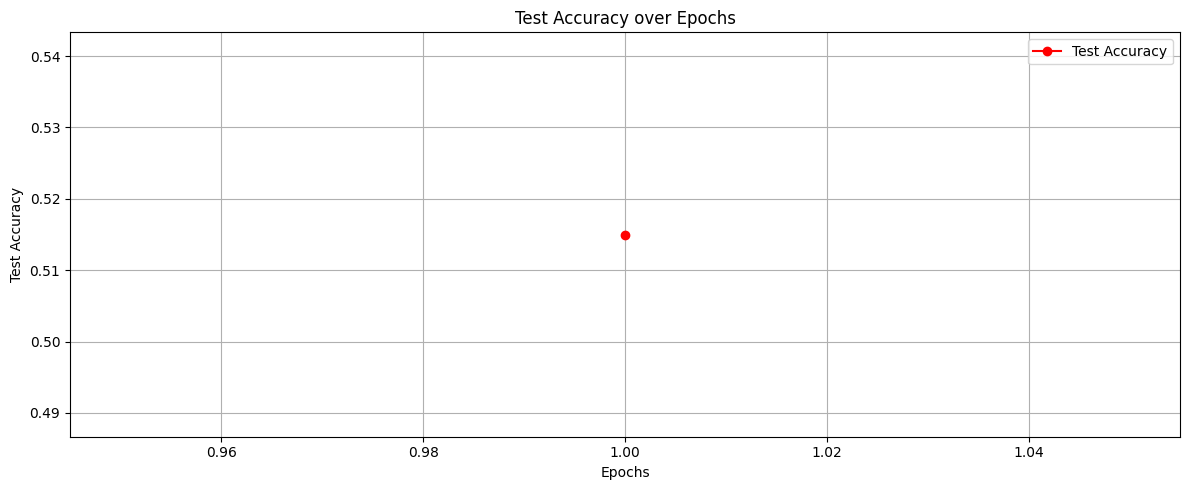

Saved model to models/models_DC/model_0_kaggle4s.pt 

Metrics for kaggle4s:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s, accuracy=0.515, batch_idx=1]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.515
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1121
len(sanity_df) = 1121
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s, accuracy=0.767, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.767
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1364
len(sanity_df) = 1364
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s, accuracy=0.721, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.721
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1620
len(sanity_df) = 1620
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s, accuracy=0.651, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.651
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8899
len(sanity_df) = 8899
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  4.14it/s, accuracy=0.511, batch_idx=9]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.511
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12401
len(sanity_df) = 12401
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s, accuracy=0.525, batch_idx=13]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.525
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18473
len(sanity_df) = 18473
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.53it/s, accuracy=0.496, batch_idx=19]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.496
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3989
len(sanity_df) = 3989
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s, accuracy=0.507, batch_idx=4]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.507
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for kaggle2019, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 1
cmap = {'X': 83, '-': 16, '~': 5, 'M': 37, 'd': 33, '(': 30, 'k': 19, '5': 15, 'p': 71, 'â': 13, '&': 77, 'Y': 56, 'é': 6, 'W': 87, '+': 80, 'n': 29, 'Z': 31, '=': 66, 'J': 76, ')': 27, '3': 55, 'K': 84, 'U': 59, '2': 86, ' ': 2, '.': 50, 'o': 53, '4': 12, 'h': 46, ':': 74, 'i': 23, '8': 89, 'f': 11, 'á': 82, 'S': 64, 's': 67, 'a': 8, '|': 7, 'D': 26, '#': 63, 'r

Epoch [1/1]: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s, batch_idx=2, loss=0.859]


Epoch [1/1] completed with average loss: 0.7349
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s, accuracy=0.772, batch_idx=1]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.772
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Finished. Training and Testing Complete!


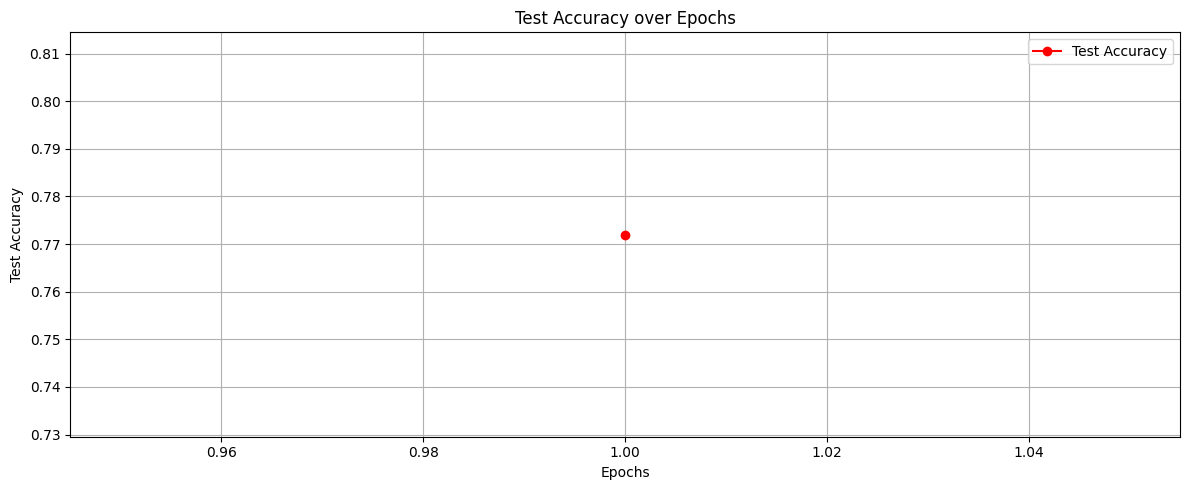

Saved model to models/models_DC/model_1_kaggle2019.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2050
len(sanity_df) = 2050
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s, accuracy=0.508, batch_idx=3]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.508
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2019:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s, accuracy=0.772, batch_idx=1]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.772
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1364
len(sanity_df) = 1364
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.67it/s, accuracy=0.722, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.722
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1620
len(sanity_df) = 1620
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s, accuracy=0.65, batch_idx=2] 
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.65
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8927
len(sanity_df) = 8927
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s, accuracy=0.511, batch_idx=9]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.511
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12479
len(sanity_df) = 12479
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s, accuracy=0.525, batch_idx=13]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.525
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18474
len(sanity_df) = 18474
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.75it/s, accuracy=0.496, batch_idx=19]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.496
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3991
len(sanity_df) = 3991
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s, accuracy=0.507, batch_idx=4]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.507
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for kaggle2020, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 1
cmap = {'X': 83, '-': 16, '~': 5, 'M': 37, 'd': 33, '(': 30, 'k': 19, '5': 15, 'p': 71, '&': 13, 'Y': 77, 'W': 56, '+': 6, 'n': 89, 'Z': 82, '=': 29, 'J': 31, ')': 66, '3': 78, 'K': 27, 'U': 91, '2': 55, ' ': 86, '[': 59, '.': 88, 'o': 2, '4': 22, 'h': 46, ':': 76, 'i': 23, '8': 85, '$': 11, 'f': 84, '*': 50, 'S': 62, 's': 8, 'a': 7, 'D': 26, '#': 80, 'r': 24, '/

Epoch [1/1]: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s, batch_idx=3, loss=0.774]


Epoch [1/1] completed with average loss: 0.8459
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s, accuracy=0.707, batch_idx=1]

Accuracy: 0.707
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Finished. Training and Testing Complete!



c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


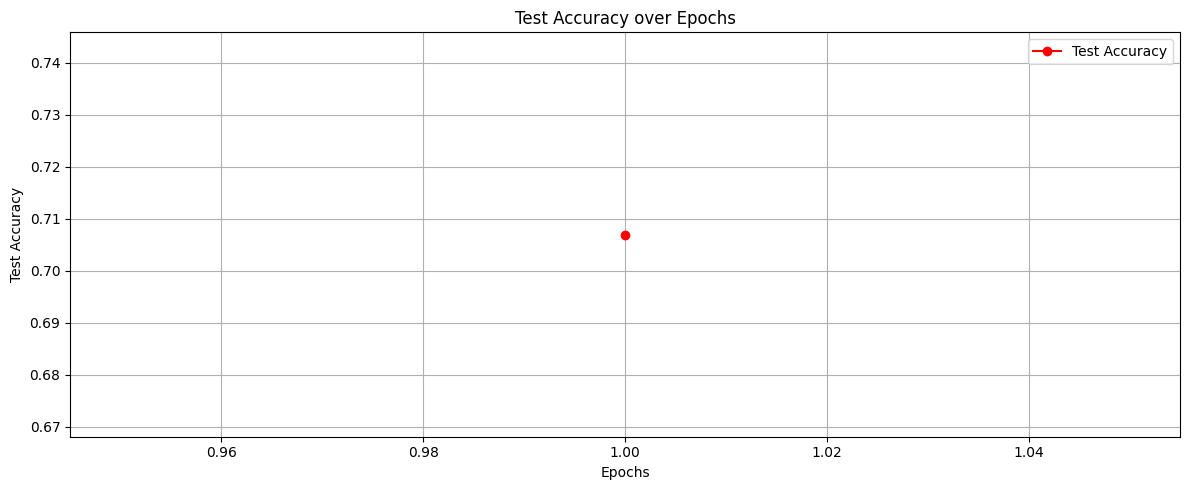

Saved model to models/models_DC/model_2_kaggle2020.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2047
len(sanity_df) = 2047
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s, accuracy=0.509, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.509
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1116
len(sanity_df) = 1116
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  6.91it/s, accuracy=0.769, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.769
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2020:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s, accuracy=0.707, batch_idx=1]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.707
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1623
len(sanity_df) = 1623
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s, accuracy=0.651, batch_idx=2]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.651
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8904
len(sanity_df) = 8904
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  4.15it/s, accuracy=0.51, batch_idx=9] 
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.51
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12483
len(sanity_df) = 12483
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s, accuracy=0.525, batch_idx=13]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.525
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18474
len(sanity_df) = 18474
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.67it/s, accuracy=0.496, batch_idx=19]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.496
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3983
len(sanity_df) = 3983
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s, accuracy=0.508, batch_idx=4]
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.508
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for kaggle2021, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 1
cmap = {'X': 83, '-': 16, '~': 5, 'M': 96, 'd': 37, '(': 33, 'k': 30, '5': 19, 'p': 108, 'Y': 15, '&': 88, 'ร': 103, 'W': 71, '+': 13, 'n': 77, 'Z': 56, '=': 6, 'J': 109, ')': 98, '3': 29, 'K': 31, 'ื': 66, 'น': 79, 'U': 94, 'พ': 73, '2': 27, ' ': 85, '[': 99, '.': 55, 'o': 105, '4': 59, 'h': 97, ':': 107, 'i': 2, '8': 22, 'ฒ': 100, 'ฐ': 45, 'f': 89, 'ฉ': 21, 'S'

Epoch [1/1]: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s, batch_idx=3, loss=0.734]


Epoch [1/1] completed with average loss: 0.8880
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s, accuracy=0.551, batch_idx=1]

Accuracy: 0.551
Precision: 0.429
Recall: 0.916
F1-Score: 0.584

Finished. Training and Testing Complete!


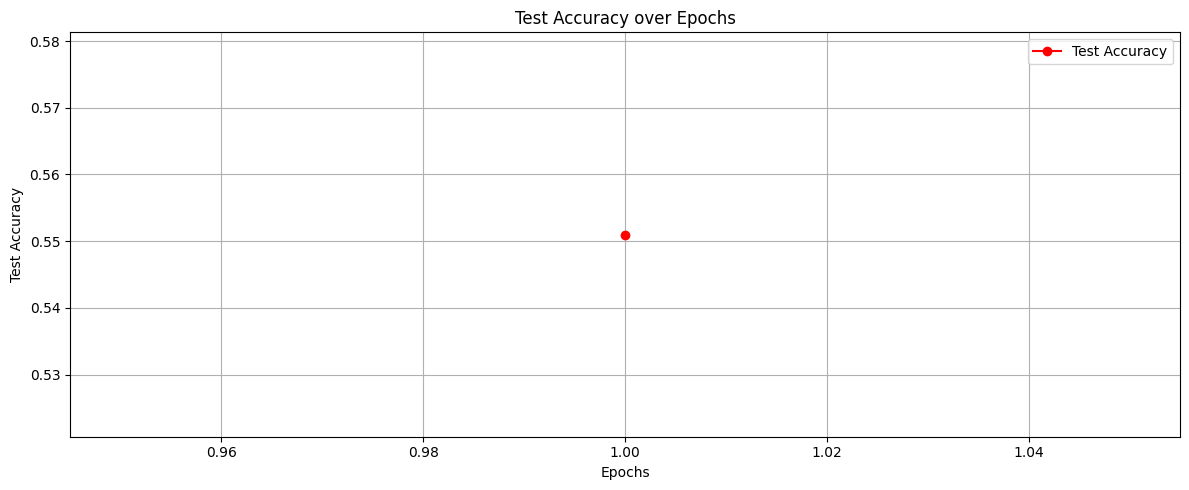

Saved model to models/models_DC/model_3_kaggle2021.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2051
len(sanity_df) = 2051
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s, accuracy=0.649, batch_idx=3]


Accuracy: 0.649
Precision: 0.593
Recall: 0.913
F1-Score: 0.719

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1119
len(sanity_df) = 1119
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s, accuracy=0.525, batch_idx=2]


Accuracy: 0.525
Precision: 0.315
Recall: 0.885
F1-Score: 0.465

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1367
len(sanity_df) = 1367
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.85it/s, accuracy=0.545, batch_idx=2]


Accuracy: 0.545
Precision: 0.372
Recall: 0.914
F1-Score: 0.529

Metrics for kaggle2021:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s, accuracy=0.551, batch_idx=1]


Accuracy: 0.551
Precision: 0.429
Recall: 0.916
F1-Score: 0.584

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8911
len(sanity_df) = 8911
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  4.11it/s, accuracy=0.509, batch_idx=9]


Accuracy: 0.509
Precision: 0.499
Recall: 0.871
F1-Score: 0.635

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12492
len(sanity_df) = 12492
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s, accuracy=0.624, batch_idx=13]


Accuracy: 0.624
Precision: 0.565
Recall: 0.906
F1-Score: 0.696

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18474
len(sanity_df) = 18474
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.61it/s, accuracy=0.637, batch_idx=19]


Accuracy: 0.637
Precision: 0.585
Recall: 0.961
F1-Score: 0.727

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3960
len(sanity_df) = 3960
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s, accuracy=0.642, batch_idx=4]


Accuracy: 0.642
Precision: 0.587
Recall: 0.924
F1-Score: 0.718

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for lbl, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 6
cmap = {'X': 83, '-': 16, '~': 5, 'M': 37, 'd': 33, '(': 30, 'k': 19, '5': 15, 'p': 88, '&': 71, 'Y': 13, 'W': 77, '+': 56, 'n': 6, 'Z': 96, '=': 90, 'J': 29, ')': 31, '3': 66, 'Ð': 79, 'K': 84, '9': 73, 'U': 27, '2': 89, ' ': 55, '[': 93, '.': 59, 'o': 95, '`': 2, '4': 22, 'h': 86, ':': 45, 'i': 75, '8': 21, '$': 91, 'f': 63, 'ƒ': 50, '*': 23, 'S': 8, 's': 7, 'a'

Epoch [1/1]: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s, batch_idx=11, loss=0.587]


Epoch [1/1] completed with average loss: 0.7173
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s, accuracy=0.82, batch_idx=3] 


Accuracy: 0.82
Precision: 0.783
Recall: 0.878
F1-Score: 0.828

Finished. Training and Testing Complete!


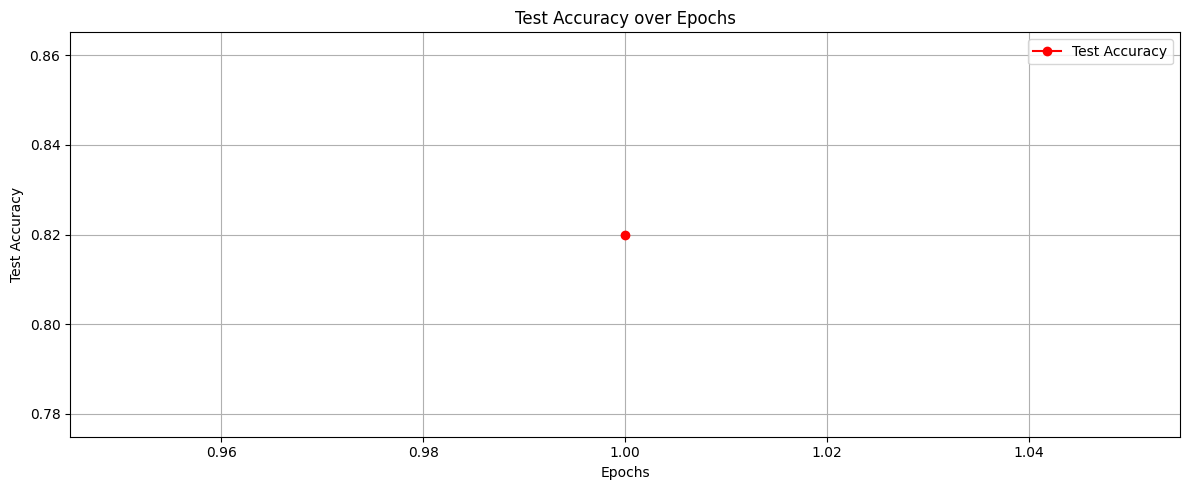

Saved model to models/models_DC/model_4_lbl.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2031
len(sanity_df) = 2031
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s, accuracy=0.629, batch_idx=2]


Accuracy: 0.629
Precision: 0.587
Recall: 0.844
F1-Score: 0.692

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1125
len(sanity_df) = 1125
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  7.14it/s, accuracy=0.453, batch_idx=2]


Accuracy: 0.453
Precision: 0.266
Recall: 0.774
F1-Score: 0.396

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1353
len(sanity_df) = 1353
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s, accuracy=0.495, batch_idx=2]


Accuracy: 0.495
Precision: 0.331
Recall: 0.77
F1-Score: 0.463

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1607
len(sanity_df) = 1607
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s, accuracy=0.429, batch_idx=2]


Accuracy: 0.429
Precision: 0.34
Recall: 0.719
F1-Score: 0.462

Metrics for lbl:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s, accuracy=0.82, batch_idx=3] 


Accuracy: 0.82
Precision: 0.783
Recall: 0.878
F1-Score: 0.828

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12491
len(sanity_df) = 12491
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s, accuracy=0.523, batch_idx=13]


Accuracy: 0.523
Precision: 0.499
Recall: 0.731
F1-Score: 0.593

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18473
len(sanity_df) = 18473
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.59it/s, accuracy=0.64, batch_idx=19] 


Accuracy: 0.64
Precision: 0.594
Recall: 0.903
F1-Score: 0.717

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3991
len(sanity_df) = 3991
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s, accuracy=0.38, batch_idx=4] 


Accuracy: 0.38
Precision: 0.423
Recall: 0.701
F1-Score: 0.527

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for ebbu, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 11
cmap = {'X': 83, '-': 16, '~': 5, 'M': 37, 'd': 33, '(': 30, 'k': 19, '5': 15, 'p': 71, '&': 13, 'Y': 56, 'W': 6, '+': 82, 'n': 75, 'Z': 29, '=': 31, 'J': 66, ')': 72, '3': 27, 'K': 55, 'U': 84, '2': 79, '.': 39, 'o': 78, '4': 53, 'h': 57, ':': 2, 'i': 50, '8': 60, '$': 12, 'f': 46, '*': 70, 'S': 23, 's': 61, 'a': 11, '|': 77, 'D': 52, '#': 8, 'r': 7, '/': 26, 't

Epoch [1/1]: 100%|██████████| 18/18 [00:07<00:00,  2.43it/s, batch_idx=18, loss=0.575]


Epoch [1/1] completed with average loss: 0.7149
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s, accuracy=0.632, batch_idx=5]

Accuracy: 0.632
Precision: 0.583
Recall: 0.995
F1-Score: 0.735

Finished. Training and Testing Complete!


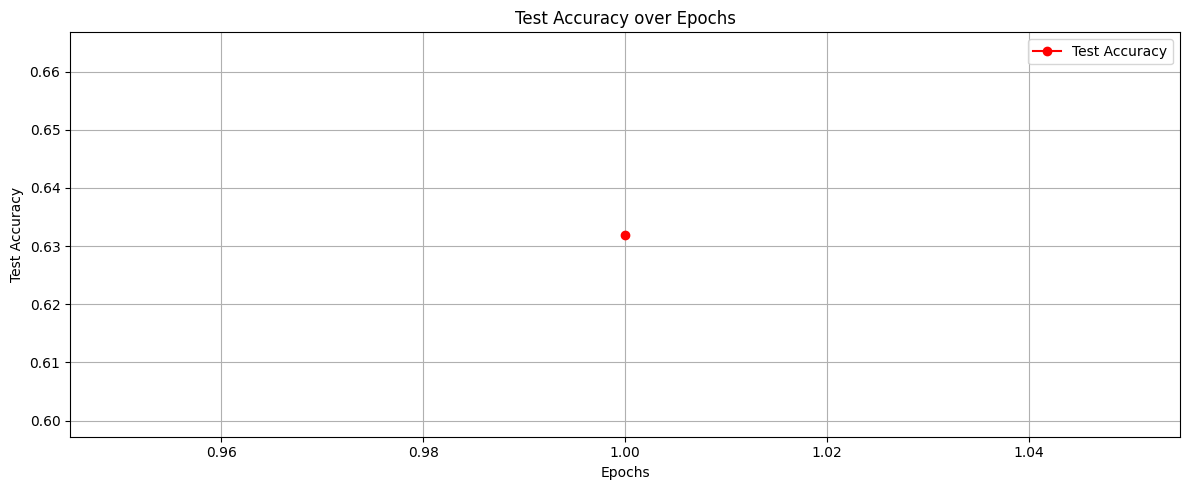

Saved model to models/models_DC/model_5_ebbu.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 1991
len(sanity_df) = 1991
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s, accuracy=0.536, batch_idx=2]


Accuracy: 0.536
Precision: 0.514
Recall: 0.979
F1-Score: 0.674

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1112
len(sanity_df) = 1112
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  7.07it/s, accuracy=0.316, batch_idx=2]


Accuracy: 0.316
Precision: 0.245
Recall: 0.992
F1-Score: 0.393

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1366
len(sanity_df) = 1366
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.23it/s, accuracy=0.33, batch_idx=2] 


Accuracy: 0.33
Precision: 0.29
Recall: 0.989
F1-Score: 0.448

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1625
len(sanity_df) = 1625
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s, accuracy=0.411, batch_idx=2]


Accuracy: 0.411
Precision: 0.369
Recall: 0.973
F1-Score: 0.535

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8925
len(sanity_df) = 8925
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s, accuracy=0.491, batch_idx=9]


Accuracy: 0.491
Precision: 0.49
Recall: 0.982
F1-Score: 0.654

Metrics for ebbu:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s, accuracy=0.632, batch_idx=5]


Accuracy: 0.632
Precision: 0.583
Recall: 0.995
F1-Score: 0.735

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18474
len(sanity_df) = 18474
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.64it/s, accuracy=0.523, batch_idx=19]


Accuracy: 0.523
Precision: 0.513
Recall: 0.997
F1-Score: 0.678

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3988
len(sanity_df) = 3988
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s, accuracy=0.585, batch_idx=4]


Accuracy: 0.585
Precision: 0.543
Recall: 0.996
F1-Score: 0.703

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for hispar, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 13
cmap = {'X': 16, '-': 5, '~': 37, 'M': 33, 'd': 30, '(': 19, 'k': 15, '5': 71, 'p': 13, '&': 56, 'Y': 6, 'W': 81, '+': 74, 'n': 29, 'Z': 31, '=': 66, 'J': 75, ')': 27, '3': 47, 'K': 43, 'U': 46, '2': 36, '.': 28, 'o': 82, '4': 78, 'h': 39, ':': 77, 'i': 53, '8': 2, 'f': 50, '*': 12, 'S': 62, 's': 69, 'a': 23, 'D': 73, '#': 11, 'r': 76, '/': 49, 't': 8, 'T': 7,

Epoch [1/1]: 100%|██████████| 22/22 [00:09<00:00,  2.36it/s, batch_idx=22, loss=0.216]


Epoch [1/1] completed with average loss: 0.4208
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 6/6 [00:01<00:00,  4.18it/s, accuracy=0.902, batch_idx=6]


Accuracy: 0.902
Precision: 0.976
Recall: 0.825
F1-Score: 0.894

Finished. Training and Testing Complete!


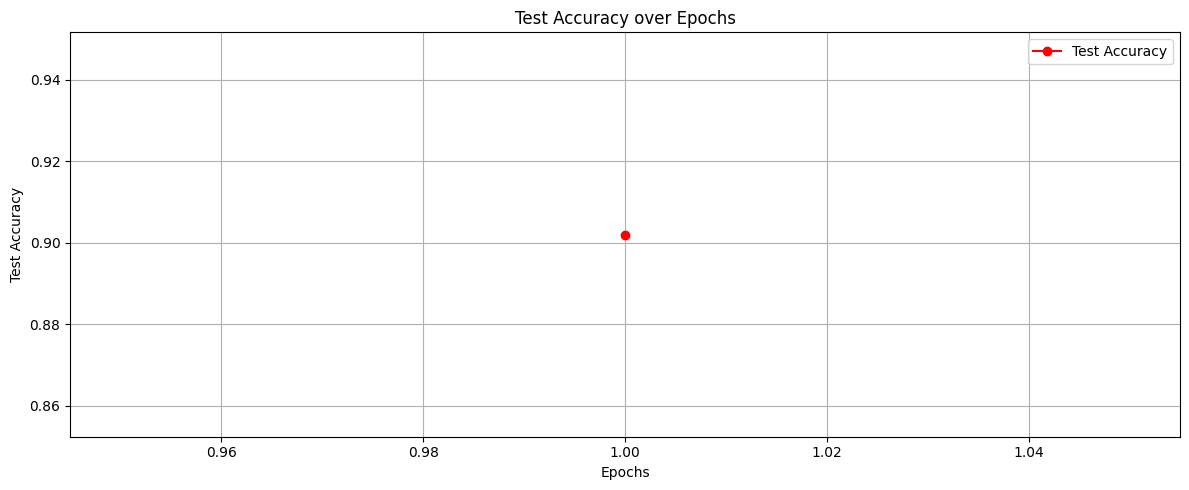

Saved model to models/models_DC/model_6_hispar.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2054
len(sanity_df) = 2054
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s, accuracy=0.593, batch_idx=3]


Accuracy: 0.593
Precision: 0.921
Recall: 0.186
F1-Score: 0.309

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1125
len(sanity_df) = 1125
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s, accuracy=0.798, batch_idx=2]


Accuracy: 0.798
Precision: 0.718
Recall: 0.215
F1-Score: 0.33

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1373
len(sanity_df) = 1373
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s, accuracy=0.771, batch_idx=2]


Accuracy: 0.771
Precision: 0.79
Recall: 0.245
F1-Score: 0.375

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1626
len(sanity_df) = 1626
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  3.80it/s, accuracy=0.736, batch_idx=2]


Accuracy: 0.736
Precision: 0.749
Recall: 0.363
F1-Score: 0.489

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8928
len(sanity_df) = 8928
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  3.20it/s, accuracy=0.59, batch_idx=9] 


Accuracy: 0.59
Precision: 0.838
Recall: 0.201
F1-Score: 0.324

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12492
len(sanity_df) = 12492
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s, accuracy=0.632, batch_idx=13]


Accuracy: 0.632
Precision: 0.927
Recall: 0.245
F1-Score: 0.387

Metrics for hispar:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s, accuracy=0.902, batch_idx=6]


Accuracy: 0.902
Precision: 0.976
Recall: 0.825
F1-Score: 0.894

Metrics for iscx:
len(test)_I = 3993
src = 7
len(test)_F = 3991
len(sanity_df) = 3991
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s, accuracy=0.564, batch_idx=4]


Accuracy: 0.564
Precision: 0.699
Recall: 0.204
F1-Score: 0.316

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

Initialing training for iscx, with epochs = 1.
Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 2
cmap = {'¬': 83, 'X': 16, '-': 5, '~': 37, 'M': 33, 'd': 30, '(': 19, 'k': 15, '5': 71, 'p': 13, '&': 56, 'Y': 6, 'W': 85, '+': 76, 'n': 29, 'Z': 31, '=': 66, 'J': 73, ')': 27, '3': 55, 'K': 80, 'U': 65, '2': 39, ' ': 79, '.': 53, 'o': 57, '4': 2, 'h': 50, ':': 61, 'i': 12, '8': 46, 'f': 77, 'S': 23, 's': 62, 'a': 11, 'D': 78, '#': 60, 'r': 8, '/': 7, 't': 26, 'T

Epoch [1/1]: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s, batch_idx=5, loss=0.773]


Epoch [1/1] completed with average loss: 0.8458
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s, accuracy=0.586, batch_idx=2]

Accuracy: 0.586
Precision: 1.0
Recall: 0.137
F1-Score: 0.242

Finished. Training and Testing Complete!


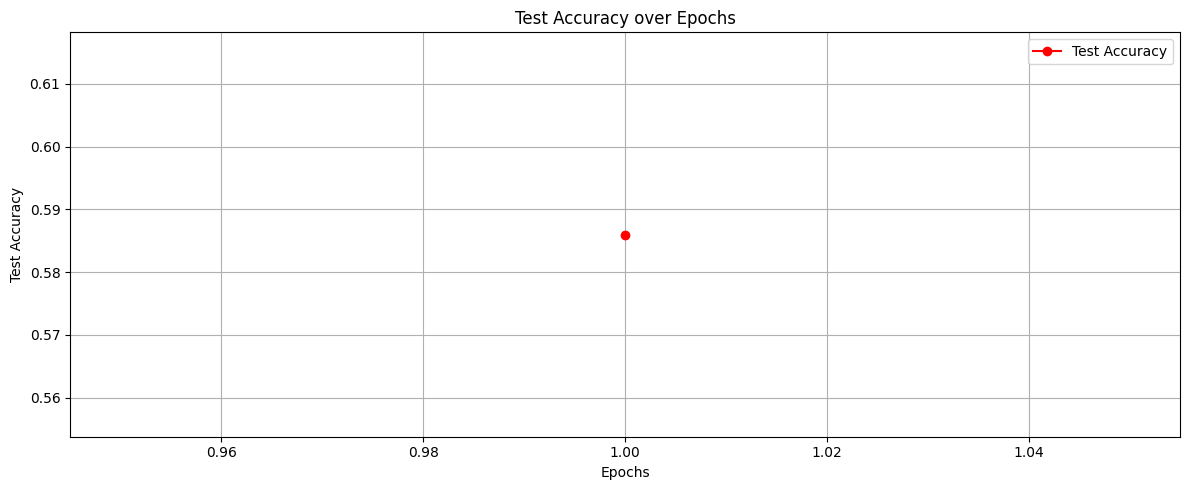

Saved model to models/models_DC/model_7_iscx.pt 

Metrics for kaggle4s:
len(test)_I = 2055
src = 0
len(test)_F = 2055
len(sanity_df) = 2055
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s, accuracy=0.523, batch_idx=3]


Accuracy: 0.523
Precision: 0.914
Recall: 0.032
F1-Score: 0.061

Metrics for kaggle2019:
len(test)_I = 1125
src = 2
len(test)_F = 1124
len(sanity_df) = 1124
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s, accuracy=0.769, batch_idx=2]


Accuracy: 0.769
Precision: 0.5
Recall: 0.012
F1-Score: 0.023

Metrics for kaggle2020:
len(test)_I = 1373
src = 1
len(test)_F = 1367
len(sanity_df) = 1367
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  5.96it/s, accuracy=0.732, batch_idx=2]


Accuracy: 0.732
Precision: 0.789
Recall: 0.04
F1-Score: 0.076

Metrics for kaggle2021:
len(test)_I = 1628
src = 3
len(test)_F = 1604
len(sanity_df) = 1604
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 2/2 [00:00<00:00,  4.32it/s, accuracy=0.647, batch_idx=2]


Accuracy: 0.647
Precision: 0.3
Recall: 0.011
F1-Score: 0.021

Metrics for lbl:
len(test)_I = 9075
src = 4
len(test)_F = 8928
len(sanity_df) = 8928
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s, accuracy=0.511, batch_idx=9]


Accuracy: 0.511
Precision: 0.5
Recall: 0.004
F1-Score: 0.009

Metrics for ebbu:
len(test)_I = 14715
src = 5
len(test)_F = 12490
len(sanity_df) = 12490
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s, accuracy=0.528, batch_idx=13]


Accuracy: 0.528
Precision: 0.825
Recall: 0.008
F1-Score: 0.016

Metrics for hispar:
len(test)_I = 18500
src = 6
len(test)_F = 18474
len(sanity_df) = 18474
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 19/19 [00:05<00:00,  3.68it/s, accuracy=0.496, batch_idx=19]


Accuracy: 0.496
Precision: 0.34
Recall: 0.002
F1-Score: 0.004

Metrics for iscx:
Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s, accuracy=0.586, batch_idx=2]

Accuracy: 0.586
Precision: 1.0
Recall: 0.137
F1-Score: 0.242

________________________________
Finished testing on all splits.

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
________________________________________________________________________________________________________________



In [19]:
metrics = []

for i, dataset_name_i in enumerate(datasets.keys()):
     train_ds = datasets[dataset_name_i]
     if len(train_ds)>10**5:
          n_ep = 1 #3 
          train_ds = datasets[dataset_name_i].sample(frac=0.005, random_state=42).reset_index(drop=True)
     else:
          n_ep = 1 #change 8
          train_ds = datasets[dataset_name_i].sample(frac=0.3, random_state=42).reset_index(drop=True)

     print(f"Initialing training for {dataset_name_i}, with epochs = {n_ep}.")
     clc_tds_dc = MyCLC(train_ds, prep=False, num_epochs=n_ep, split=True)
     clc_tds_dc.run()
     #clc_tds_dc.save_model(f"models/models_DC/model_{i}_{dataset_name_i}.pt")
     print(f"Saved model to models/models_DC/model_{i}_{dataset_name_i}.pt ")
     print("")

     for j,dataset_name_j in enumerate(datasets.keys()):
          print(f"Metrics for {dataset_name_j}:")
          if dataset_name_j!=dataset_name_i:
               test_ds_j = datasets[dataset_name_j] #.sample(frac=0.005).reset_index(drop=True) #remove this #reset index here makes a dif bc not handled internally
               if len(test_ds_j)>10**5:
                    test_ds_j = test_ds_j.sample(frac=0.0025, random_state=42).reset_index(drop=True)
               else:
                    test_ds_j = test_ds_j.sample(frac=0.2, random_state=42).reset_index(drop=True)

               print(f"len(test)_I = {len(test_ds_j)}")

               src = test_ds_j['source'].iloc[0] #np int 64, cast to int?, or simply j?
               print(f"src = {src}")

               ##merge, remove conflicts and dups. for sanity check print removecommonurls
               df_temp = pd.concat([train_ds, test_ds_j])
               df_temp = destroy_DC(df_temp) 

               test_ds_j = df_temp[df_temp['source'] == src].reset_index(drop=True).copy()

               print(f"len(test)_F = {len(test_ds_j)}")

               sanity_df = remove_common_urls(test_ds_j, train_ds)
               print(f"len(sanity_df) = {len(sanity_df)}")
               ############################################################################
               f1_j = clc_tds_dc.test(test_ds_j, return_metrics=True)[3]
               metrics.append(f1_j)
          else:
               f1_i = clc_tds_dc.test(return_metrics=True)[3] #no args, by default test
               metrics.append(f1_i)
          print("")

     metrics.append(-1) #separator
     print("________________________________")
     print("Finished testing on all splits.")
     print("\n________________________________________________________________________________________________________________\n________________________________________________________________________________________________________________\n________________________________________________________________________________________________________________\n")
        

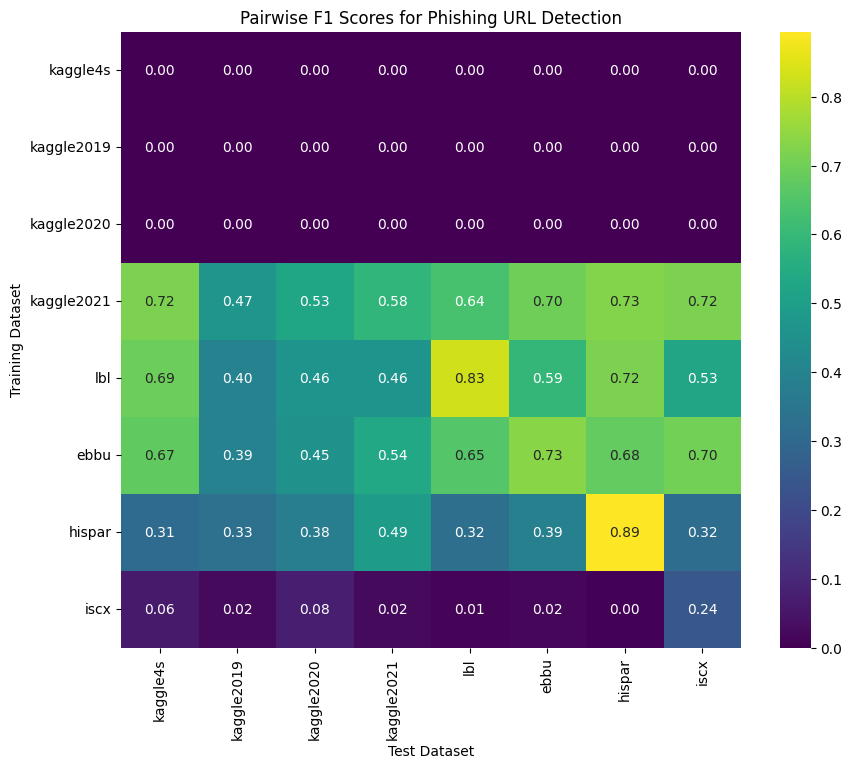

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#'datasets' is dict of dataset names and dataframes.
dataset_names = list(datasets.keys())
n = len(dataset_names)

#parse the flat metrics list into a 2D list (matrix) by ignoring the separator (-1)
heatmap_data = []
#each row in metrics consists of n metric values followed by a separator.
for i in range(n):
    start_idx = i * (n + 1)  #each row has n metrics plus 1 separator
    row_metrics = metrics[start_idx : start_idx + n]  #skip the separator at the end
    heatmap_data.append(row_metrics)

#convert the 2D list to a numpy array for plotting
heatmap_data = np.array(heatmap_data)

#plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",
                 xticklabels=dataset_names, yticklabels=dataset_names)
plt.title("Pairwise F1 Scores for Phishing URL Detection")
plt.xlabel("Test Dataset")
plt.ylabel("Training Dataset")
plt.show()

# ______________

### demo destroy dups

In [9]:
# --------------------------------------------------------------------------------------------------------
# Create a dummy dataframe
# --------------------------------------------------------------------------------------------------------
data = {
    'url': ['example.com', 'example.com', 'phishing.com', 'safe.com', 'phishing.com', 'test.com'],
    'status': [0, 1, 1, 0, 1, 0],
    'source': [0, 0, 1, 2, 1, 3]
}
df_dummy = pd.DataFrame(data)
print("Dummy DataFrame:")
print(df_dummy)
print("\n")

# ------------------------------------------------------------------------------
# Apply destroy_duplicates
# ------------------------------------------------------------------------------
df_no_dups = destroy_DC(df_dummy, verbose=True)
print("\nDataFrame after destroying duplicates:")
print(df_no_dups)
print("\n")

# ------------------------------------------------------------------------------
# Example: Filter for a specific 'source'
# Let's say we want to keep only entries where source == 2
# ------------------------------------------------------------------------------
source_to_keep = 2
df_final = df_no_dups[df_no_dups['source'] == source_to_keep].copy()
print(f"DataFrame after filtering for source == {source_to_keep}:")
print(df_final)

Dummy DataFrame:
            url  status  source
0   example.com       0       0
1   example.com       1       0
2  phishing.com       1       1
3      safe.com       0       2
4  phishing.com       1       1
5      test.com       0       3


Found duplicate URLs (to be removed):
 - example.com
 - phishing.com

DataFrame after destroying duplicates:
        url  status  source
3  safe.com       0       2
5  test.com       0       3


DataFrame after filtering for source == 2:
        url  status  source
3  safe.com       0       2


# THE 0.82

In [5]:
weird_model = MyCLC(hisp)

weird_model.load_model('model_5_ebbu.pt')

RuntimeError: Error(s) in loading state_dict for URLPhishingClassifier:
	Missing key(s) in state_dict: "embedding.weight", "convs.0.weight", "convs.0.bias", "convs.1.weight", "convs.1.bias", "convs.2.weight", "convs.2.bias", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 
	Unexpected key(s) in state_dict: "module.embedding.weight", "module.convs.0.weight", "module.convs.0.bias", "module.convs.1.weight", "module.convs.1.bias", "module.convs.2.weight", "module.convs.2.bias", "module.fc1.weight", "module.fc1.bias", "module.fc2.weight", "module.fc2.bias". 

In [ ]:
import torch
from collections import OrderedDict

#load the saved
checkpoint = torch.load('model_5_ebbu.pt', map_location=torch.device('cpu'))
state_dict = checkpoint["model_state_dict"]

#create new state dict without weird module added by kaggle
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    new_key = key.replace("module.", "")  #remove 'module.' from key (if exists, which it does)
    new_state_dict[new_key] = value

#load new state dict
weird_model.model.load_state_dict(new_state_dict)

devc = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #manually alter device
weird_model.device = devc
weird_model.model = weird_model.model.to(weird_model.device)

In [7]:
weird_model.test(iscx_test)
weird_model.test(hisp.reset_index(drop=True))

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s, accuracy=0.874, batch_idx=4]


Accuracy: 0.874
Precision: 0.847
Recall: 0.916
F1-Score: 0.88
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:29<00:00,  3.05it/s, accuracy=0.845, batch_idx=91]


Accuracy: 0.845
Precision: 0.947
Recall: 0.731
F1-Score: 0.825


_________

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 36
cmap = {'W': 83, '2': 16, 'M': 5, '_': 37, 'd': 33, 'K': 30, 'N': 19, '&': 15, 'b': 71, '~': 13, 'p': 56, '3': 6, '/': 81, 'f': 74, 'Q': 29, 'U': 31, '$': 66, '*': 75, 's': 27, ';': 47, '-': 43, 'q': 46, 'r': 36, '1': 28, 'e': 82, 'n': 78, 'x': 39, 'o': 77, '6': 53, 'z': 2, 'B': 50, '!': 12, 'c': 62, '.': 69, 'F': 23, 'Y': 73, '+': 11, '8': 76, 't': 49, 'k': 8, ':': 7, 'Z': 26, 'L': 44, 'u': 24, 'D': 40, 'a': 18, '=': 4, 'C': 68, '%': 9, 'X': 42, '4': 63, '9': 48, 'y': 64, 'H': 60, 'R': 22, 'E': 21, 'j': 70, '(': 20, 'G': 41, '#': 57, 'J': 80, 'O': 3, 'P': 35, 'S': 61, 'v': 45, 'h': 58, '0': 67, ')': 25, ',': 72, 'g': 38, '@': 52, 'T': 79, 'm': 32, '?': 65, 'A': 10, 'I': 55, '5': 14, 'i': 34, 'V': 54, 'w': 51, 'l': 17, '7': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 Data Loaders.


-----------------------------------------------------

Epoch [1/8]: 100%|██████████| 58/58 [00:27<00:00,  2.12it/s, batch_idx=58, loss=0.12] 


Epoch [1/8] completed with average loss: 0.3843
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:04<00:00,  3.11it/s, accuracy=0.942, batch_idx=15]


Accuracy: 0.942
Precision: 0.955
Recall: 0.93
F1-Score: 0.942


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 58/58 [00:27<00:00,  2.10it/s, batch_idx=58, loss=0.139] 


Epoch [2/8] completed with average loss: 0.1327
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:05<00:00,  2.92it/s, accuracy=0.966, batch_idx=15]


Accuracy: 0.966
Precision: 0.973
Recall: 0.958
F1-Score: 0.966


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 58/58 [00:27<00:00,  2.10it/s, batch_idx=58, loss=0.0735]


Epoch [3/8] completed with average loss: 0.0906
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:04<00:00,  3.10it/s, accuracy=0.973, batch_idx=15]


Accuracy: 0.973
Precision: 0.986
Recall: 0.96
F1-Score: 0.973


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 58/58 [00:27<00:00,  2.09it/s, batch_idx=58, loss=0.0428]


Epoch [4/8] completed with average loss: 0.0689
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:04<00:00,  3.17it/s, accuracy=0.98, batch_idx=15] 


Accuracy: 0.98
Precision: 0.982
Recall: 0.978
F1-Score: 0.98


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 58/58 [00:27<00:00,  2.13it/s, batch_idx=58, loss=0.0363]


Epoch [5/8] completed with average loss: 0.0504
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:04<00:00,  3.14it/s, accuracy=0.983, batch_idx=15]


Accuracy: 0.983
Precision: 0.983
Recall: 0.984
F1-Score: 0.983


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 58/58 [00:27<00:00,  2.14it/s, batch_idx=58, loss=0.0291]


Epoch [6/8] completed with average loss: 0.0411
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:04<00:00,  3.11it/s, accuracy=0.983, batch_idx=15]


Accuracy: 0.983
Precision: 0.979
Recall: 0.989
F1-Score: 0.984


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 58/58 [00:27<00:00,  2.12it/s, batch_idx=58, loss=0.0204]


Epoch [7/8] completed with average loss: 0.0314
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s, accuracy=0.985, batch_idx=15]


Accuracy: 0.985
Precision: 0.987
Recall: 0.985
F1-Score: 0.986


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 58/58 [00:28<00:00,  2.04it/s, batch_idx=58, loss=0.0237]


Epoch [8/8] completed with average loss: 0.0290
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 15/15 [00:05<00:00,  2.88it/s, accuracy=0.987, batch_idx=15]


Accuracy: 0.987
Precision: 0.99
Recall: 0.984
F1-Score: 0.987

Finished. Training and Testing Complete!


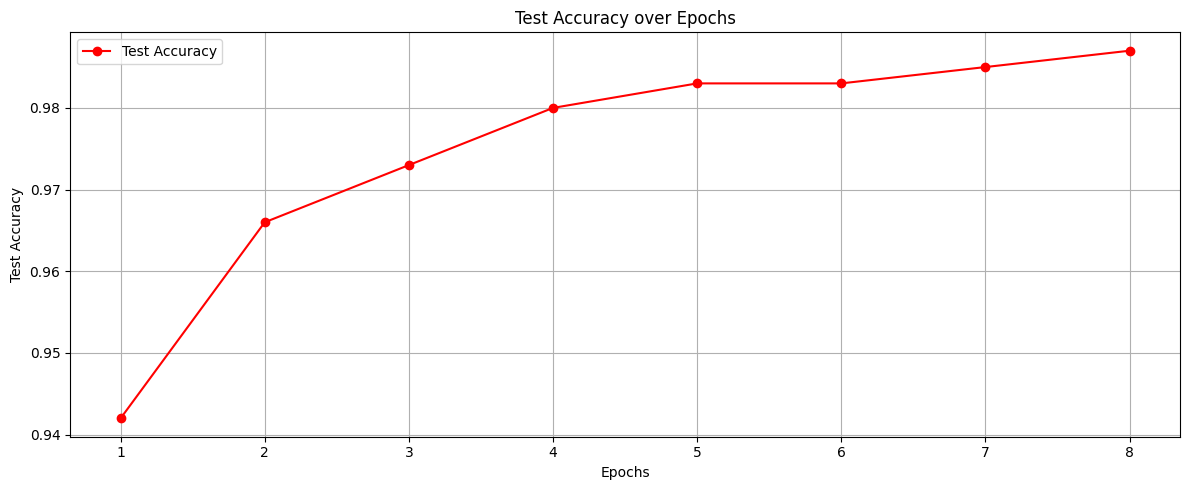

In [9]:
clc_temp_ebbu = MyCLC(df=ebbu, num_epochs=8, prep=False, split=True)
clc_temp_ebbu.run()

In [10]:
clc_temp_ebbu.test(hisp.reset_index(drop=True))

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 91/91 [00:30<00:00,  3.00it/s, accuracy=0.897, batch_idx=91]


Accuracy: 0.897
Precision: 0.939
Recall: 0.849
F1-Score: 0.892


## Pos - DC OFF

### ebbu questions

In [12]:
datasets = buildDataframes(source=True)

print("\n----------------------------------------")
#prep: no prefix, internal dc removal:
for i,dataset_name in enumerate(datasets.keys()):
    dataset_i = datasets[dataset_name]
    print(f"dataset_{i}: {dataset_name}")
    print(f"len_i = {len(dataset_i)}")
    dataset_i_ndc = preprocess_df(dataset_i) #remove https
    dataset_i_ndc = discarder(dataset_i_ndc,verbose=True) #internal DC
    datasets[dataset_name] = dataset_i_ndc
    print("")
    print(f"len_f = {len(dataset_i_ndc)}")
    print("Prep + N-DC completed.")
    if i!=len(datasets)-1: print("----------------------------------------")

Kaggle4S sucessfully loaded!
Kaggle2020 sucessfully loaded!
Kaggle2019 sucessfully loaded!
Kaggle2021 sucessfully loaded!
Look Before Leap data sucessfully loaded!
EBBU2017 sucessfully loaded!
HISPAR sucessfully loaded!
ISCX-URL2016 sucessfully loaded!

----------------------------------------
dataset_0: kaggle4s
len_i = 822010
There were 27239 duplicates/conflicts removed.

len_f = 794771
Prep + N-DC completed.
----------------------------------------
dataset_1: kaggle2019
len_i = 450176
There were 7015 duplicates/conflicts removed.

len_f = 443161
Prep + N-DC completed.
----------------------------------------
dataset_2: kaggle2020
len_i = 549346
There were 42948 duplicates/conflicts removed.

len_f = 506398
Prep + N-DC completed.
----------------------------------------
dataset_3: kaggle2021
len_i = 651191
There were 20034 duplicates/conflicts removed.

len_f = 631157
Prep + N-DC completed.
----------------------------------------
dataset_4: lbl
len_i = 45373
There were 1774 duplica

In [13]:
debbu = datasets['ebbu']
discx = datasets['iscx']

In [ ]:
# print(len(debbu))
# print(len(discx))

52000
19880


Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 9
cmap = {'4': 83, 'Y': 16, '2': 5, 'P': 37, 'W': 33, '+': 30, 'V': 19, 'f': 15, '~': 71, 'U': 13, '?': 56, ';': 6, 'O': 81, '=': 74, '8': 29, ':': 31, 'e': 66, 'Z': 75, 't': 27, 'H': 47, '(': 43, '1': 46, 'g': 36, 'I': 28, 'j': 82, '@': 78, 'x': 39, 'r': 77, 'o': 53, 'D': 2, 'p': 50, 'N': 12, 'i': 62, ' ': 69, 'c': 23, 'S': 73, 'E': 11, 'u': 76, 'k': 49, 'X': 8, 'J': 7, 'w': 26, '6': 44, '3': 24, 's': 40, 'z': 18, 'h': 4, 'a': 68, ',': 9, '&': 42, 'l': 63, ')': 48, '!': 64, '%': 60, '.': 22, '0': 21, 'q': 70, '*': 20, 'Q': 41, 'L': 57, 'v': 80, '_': 3, '#': 35, 'R': 61, '/': 45, 'C': 58, 'B': 67, 'G': 25, '9': 72, 'F': 38, '5': 52, 'A': 79, 'K': 32, 'T': 65, 'n': 10, 'd': 55, '7': 14, '-': 34, 'm': 54, 'M': 51, 'b': 17, 'y': 59}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 Data Loaders.


------------------------------------------------------

Epoch [1/8]: 100%|██████████| 16/16 [00:07<00:00,  2.02it/s, batch_idx=16, loss=0.268]


Epoch [1/8] completed with average loss: 0.5182
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s, accuracy=0.908, batch_idx=4]


Accuracy: 0.908
Precision: 0.854
Recall: 0.985
F1-Score: 0.915


--------------------------------------------------------------------------------------------




Epoch [2/8]: 100%|██████████| 16/16 [00:07<00:00,  2.05it/s, batch_idx=16, loss=0.136]


Epoch [2/8] completed with average loss: 0.1773
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s, accuracy=0.965, batch_idx=4]


Accuracy: 0.965
Precision: 0.973
Recall: 0.957
F1-Score: 0.964


--------------------------------------------------------------------------------------------




Epoch [3/8]: 100%|██████████| 16/16 [00:07<00:00,  2.07it/s, batch_idx=16, loss=0.0679]


Epoch [3/8] completed with average loss: 0.0893
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s, accuracy=0.981, batch_idx=4]


Accuracy: 0.981
Precision: 0.987
Recall: 0.976
F1-Score: 0.981


--------------------------------------------------------------------------------------------




Epoch [4/8]: 100%|██████████| 16/16 [00:07<00:00,  2.06it/s, batch_idx=16, loss=0.0557]


Epoch [4/8] completed with average loss: 0.0506
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s, accuracy=0.989, batch_idx=4]


Accuracy: 0.989
Precision: 0.99
Recall: 0.988
F1-Score: 0.989


--------------------------------------------------------------------------------------------




Epoch [5/8]: 100%|██████████| 16/16 [00:07<00:00,  2.06it/s, batch_idx=16, loss=0.0239]


Epoch [5/8] completed with average loss: 0.0348
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s, accuracy=0.993, batch_idx=4]


Accuracy: 0.993
Precision: 0.993
Recall: 0.994
F1-Score: 0.993


--------------------------------------------------------------------------------------------




Epoch [6/8]: 100%|██████████| 16/16 [00:07<00:00,  2.04it/s, batch_idx=16, loss=0.0137]


Epoch [6/8] completed with average loss: 0.0218
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s, accuracy=0.994, batch_idx=4]


Accuracy: 0.994
Precision: 0.993
Recall: 0.996
F1-Score: 0.994


--------------------------------------------------------------------------------------------




Epoch [7/8]: 100%|██████████| 16/16 [00:07<00:00,  2.05it/s, batch_idx=16, loss=0.0181]


Epoch [7/8] completed with average loss: 0.0171
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s, accuracy=0.993, batch_idx=4]


Accuracy: 0.993
Precision: 0.996
Recall: 0.991
F1-Score: 0.993


--------------------------------------------------------------------------------------------




Epoch [8/8]: 100%|██████████| 16/16 [00:07<00:00,  2.07it/s, batch_idx=16, loss=0.0111] 


Epoch [8/8] completed with average loss: 0.0146
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s, accuracy=0.994, batch_idx=4]

Accuracy: 0.994
Precision: 0.995
Recall: 0.994
F1-Score: 0.994

Finished. Training and Testing Complete!


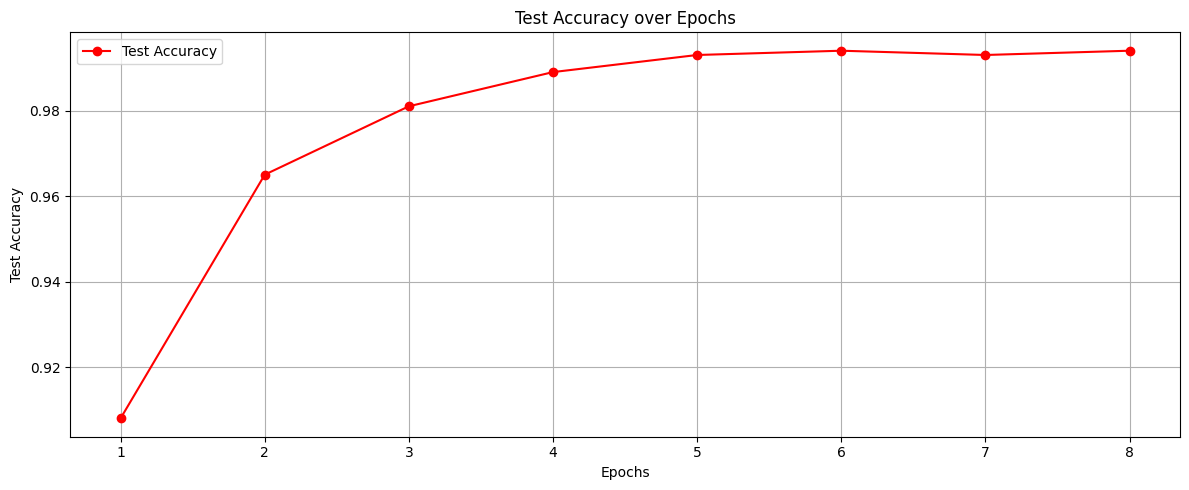

In [18]:
clc_ndc = MyCLC(discx, num_epochs=8, split=True)
clc_ndc.run()

In [20]:
print(f"len(debbu)_I = {len(debbu)}")

src = debbu['source'].iloc[0] #np int 64, cast to int?, or simply j?
print(f"src = {src}")

##merge, remove conflicts and dups. for sanity check print removecommonurls
df_temp = pd.concat([discx, debbu])
print(f"len_cat = {len(df_temp)}")

df_temp = destroy_DC(df_temp)

print(f"len_destroy = {len(df_temp)}")

debbu = df_temp[df_temp['source'] == src].reset_index(drop=True).copy()

print(f"len(debbu)_F = {len(debbu)}")

sanity_df = remove_common_urls(debbu, discx)
print(f"len(sanity_df) = {len(sanity_df)}") 

len(debbu)_I = 52000
src = 5
len_cat = 71880
len_destroy = 71880
len(debbu)_F = 52000
len(sanity_df) = 52000


In [19]:
clc_ndc.test(debbu)

Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 51/51 [00:15<00:00,  3.24it/s, accuracy=0.678, batch_idx=51]

Accuracy: 0.678
Precision: 0.57
Recall: 0.976
F1-Score: 0.72


### 4s - 2020

In [23]:
k4s = datasets['kaggle4s']

Initialising 80.0/20.0 % train/test splitting.
Finished splitting.

Generating character map.
frequency_threshold = 397
cmap = {'4': 83, 'Y': 16, '2': 5, 'W': 37, 'P': 33, '+': 30, 'V': 19, 'f': 15, '~': 71, 'U': 13, '?': 56, ';': 6, 'O': 85, '=': 76, '8': 29, ':': 31, 'e': 66, 'Z': 73, 't': 27, 'H': 55, '(': 80, '1': 65, 'g': 39, 'I': 79, 'j': 53, '@': 57, 'x': 2, 'r': 50, 'o': 61, 'D': 12, 'p': 46, 'N': 77, 'i': 23, ' ': 62, 'c': 11, 'S': 78, 'E': 60, 'u': 8, 'k': 7, 'X': 26, 'J': 48, 'w': 24, '6': 44, '3': 40, 's': 18, 'z': 4, 'h': 70, 'a': 36, "'": 9, ',': 69, '&': 47, 'l': 20, ')': 25, '!': 34, '%': 45, '.': 43, '0': 42, 'q': 3, '*': 49, 'Q': 82, 'L': 51, 'v': 54, '_': 38, '#': 68, 'R': 14, '/': 10, 'C': 84, 'B': 72, 'G': 35, '9': 17, 'F': 52, '\\': 22, '5': 75, 'A': 74, 'K': 28, 'T': 64, 'n': 21, 'd': 81, '7': 67, '-': 58, 'm': 32, 'M': 41, 'b': 59, 'y': 63}
Finished generating charmap.

Starting data loaders.
Sucessfully loaded 2 Data Loaders.


---------------------------------

Epoch [1/3]: 100%|██████████| 621/621 [04:03<00:00,  2.55it/s, batch_idx=621, loss=0.145] 


Epoch [1/3] completed with average loss: 0.1660
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 156/156 [00:40<00:00,  3.83it/s, accuracy=0.967, batch_idx=156]


Accuracy: 0.967
Precision: 0.975
Recall: 0.953
F1-Score: 0.964


--------------------------------------------------------------------------------------------




Epoch [2/3]: 100%|██████████| 621/621 [04:01<00:00,  2.57it/s, batch_idx=621, loss=0.0889]


Epoch [2/3] completed with average loss: 0.0951
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 156/156 [00:40<00:00,  3.84it/s, accuracy=0.972, batch_idx=156]


Accuracy: 0.972
Precision: 0.98
Recall: 0.96
F1-Score: 0.97


--------------------------------------------------------------------------------------------




Epoch [3/3]: 100%|██████████| 621/621 [04:04<00:00,  2.54it/s, batch_idx=621, loss=0.0864]


Epoch [3/3] completed with average loss: 0.0804
_____________________________________________________________

Device cuda is available. Initialising evaluation:


Test Set (80-20 split): 100%|██████████| 156/156 [00:40<00:00,  3.82it/s, accuracy=0.976, batch_idx=156]


Accuracy: 0.976
Precision: 0.982
Recall: 0.965
F1-Score: 0.973

Finished. Training and Testing Complete!


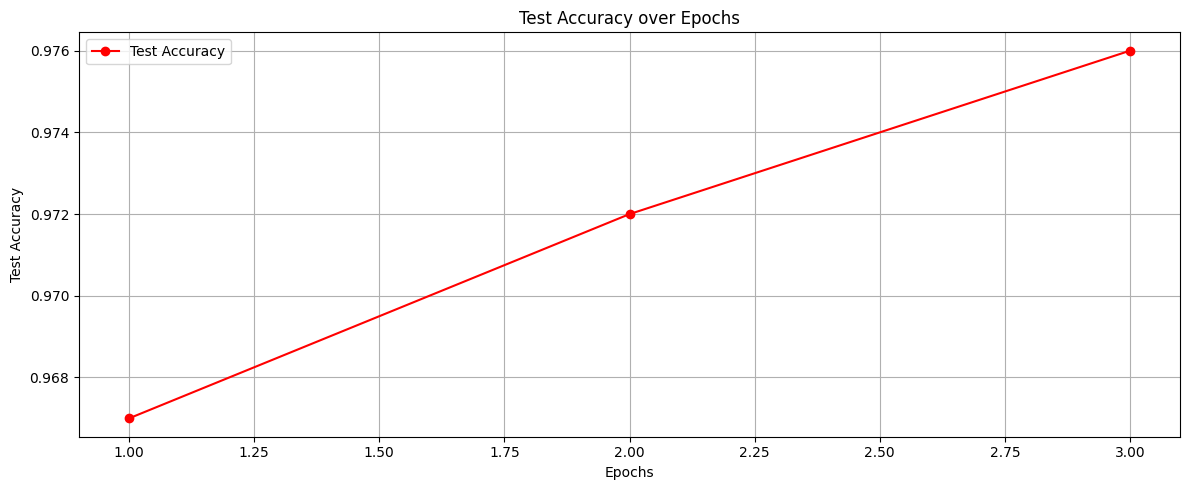

In [24]:
clc_k4s = MyCLC(k4s, num_epochs=3, split=True)
clc_k4s.run()

In [25]:
k2020 = datasets['kaggle2020'].copy()

k2020 = k2020.reset_index(drop=True)

print(f"len(test)_I = {len(k2020)}")

src = k2020['source'].iloc[0]
print(f"src = {src}")

##merge, remove conflicts and dups. for sanity check print removecommonurls
df_temp = pd.concat([k4s, k2020])
print(f"len_cat = {len(df_temp)}")

df_temp = destroy_DC(df_temp)
print(f"len_destroy = {len(df_temp)}")

k2020 = df_temp[df_temp['source'] == src].reset_index(drop=True).copy() #keep j'th source (sort of, weird order conflict)

print(f"len(test)_F = {len(k2020)}")

sanity_df = remove_common_urls(k2020, k4s)
print(f"len(sanity_df) = {len(sanity_df)}")
print("\n__________________________________________________________________________________________________\n__________________________________________________________________________________________________\n__________________________________________________________________________________________________")

clc_k4s.test(k2020)

len(test)_I = 506398
src = 1
len_cat = 1301169
len_destroy = 288391
len(test)_F = 9
len(sanity_df) = 9

__________________________________________________________________________________________________
__________________________________________________________________________________________________
__________________________________________________________________________________________________
Device cuda is available. Initialising evaluation:


External Dataset: 100%|██████████| 1/1 [00:00<00:00, 19.09it/s, accuracy=0.667, batch_idx=1]

Accuracy: 0.667
Precision: 0.333
Recall: 0.5
F1-Score: 0.4


### Suspicious Low-Counts

Above we can see we are having very low counts of training URLs for some sets. Here we will evaluate which are those cases.

In [ ]:
counts = []

for i, dataset_name_i in enumerate(datasets.keys()):
    train_ds = datasets[dataset_name_i]

    print(f"Training simulated for {dataset_name_i}")
    
    for j,dataset_name_j in enumerate(datasets.keys()):
        print(f"Counts for {dataset_name_j}:")
        if dataset_name_j!=dataset_name_i:
            test_ds_j = datasets[dataset_name_j].reset_index(drop = True) 
            len_test_I = len(test_ds_j)
            print(f"len(test)_I = {len_test_I}")
    
            src = test_ds_j['source'].iloc[0]
            print(f"src = {src}")
            
            ##merge, remove conflicts and dups. for sanity check print removecommonurls
            df_temp = pd.concat([train_ds, test_ds_j])
            print(f"len_cat = {len(df_temp)}")
    
            
            df_temp = destroy_DC(df_temp)
            print(f"len_destroy = {len(df_temp)}")

            test_ds_j = df_temp[df_temp['source'] == src].reset_index(drop=True).copy() #keep j'th source (sort of, weird order conflict)
            len_test_F = len(test_ds_j)
            print(f"len(test)_F = {len_test_F}")
            
            sanity_df = remove_common_urls(test_ds_j, train_ds)
            print(f"len(sanity_df) = {len(sanity_df)}")
            print("")

            if len(sanity_df)!=len_test_F:
                raise ValueError('''len(sanity_df) doesn't agree with len_test_F. Something unexpected happened with the data preprocessing.''')
            ############################################################################
            counts.append(len(test_ds_j)/len_test_I)
        else:
            counts.append(0) #just for matrix to be coherent
        print("--------------")

    counts.append(-1) #separator
    print("________________________________")
    print("Finished testing on all splits.")
    print("\n________________________________________________________________________________________________________________\n________________________________________________________________________________________________________________\n________________________________________________________________________________________________________________\n")

Training simulated for kaggle4s
Counts for kaggle4s:
--------------
Counts for kaggle2019:
len(test)_I = 443161
src = 2
len_cat = 1237932
len_destroy = 418196
len(test)_F = 33293
len(sanity_df) = 33293

--------------
Counts for kaggle2020:
len(test)_I = 506398
src = 1
len_cat = 1301169
len_destroy = 288391
len(test)_F = 9
len(sanity_df) = 9

--------------
Counts for kaggle2021:
len(test)_I = 631157
src = 3
len_cat = 1425928
len_destroy = 546908
len(test)_F = 191647
len(sanity_df) = 191647

--------------
Counts for lbl:
len(test)_I = 43599
src = 4
len_cat = 838370
len_destroy = 784718
len(test)_F = 16773
len(sanity_df) = 16773

--------------
Counts for ebbu:
len(test)_I = 52017
src = 5
len_cat = 846788
len_destroy = 742754
len(test)_F = 0
len(sanity_df) = 0

--------------
Counts for hispar:
len(test)_I = 92242
src = 6
len_cat = 887013
len_destroy = 885981
len(test)_F = 91726
len(sanity_df) = 91726

--------------
Counts for iscx:
len(test)_I = 19880
src = 7
len_cat = 814651
len_des

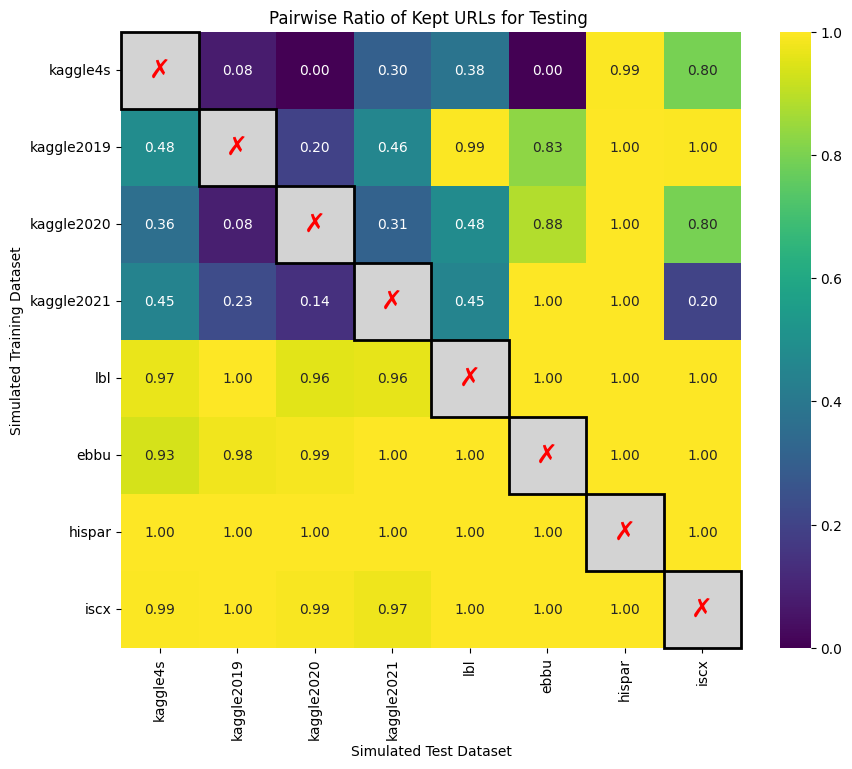

In [ ]:
import numpy as np
import seaborn as sns 

dataset_names = list(datasets.keys())
n = len(dataset_names)

#parse the flat metrics list into a 2D list (matrix) by ignoring the separator (-1)
heatmap_data = []
#each row in counts consists of n count values followed by a separator.
for i in range(n):
    start_idx = i * (n + 1)  #each row has n metrics plus 1 separator
    row_metrics = counts[start_idx : start_idx + n]  #skip the separator at the end
    heatmap_data.append(row_metrics)

# for i in range(len(heatmap_data)):
#     heatmap_data[i][i]=1


#convert the 2D list to a numpy array for plotting
heatmap_data = np.array(heatmap_data)

np.fill_diagonal(heatmap_data, np.nan)


#plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",
                 xticklabels=dataset_names, yticklabels=dataset_names)

# Overlay X's on the diagonal
for i in range(len(heatmap_data)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, color='lightgray', lw=0))  #grey fill
    ax.text(i + 0.5, i + 0.5, "✗", ha='center', va='center', fontsize=19, color='red', fontweight='bold')
    rect = plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='black', lw=2, clip_on = False)
    ax.add_patch(rect)

plt.title("Pairwise Ratio of Kept URLs for Testing ")
plt.xlabel("Simulated Test Dataset")
plt.ylabel("Simulated Training Dataset")
plt.show()

As we can see, it doesn't make sense to consider the reuslts between *kaggle4s* and {*kaggle2020*, *ebbu*}, and hence in our paper these entries were filled with 0.

## References

**[1]** An Effective Phishing Detection Model Based on Character Level Convolutional Neural Network from URL by Aljofey, et al.

**[2]** Accurate and fast URL phishing detector: A convolutional neural network approach by Wei, et al.

**[3]** URLNet: Learning a URL Representation with Deep Learning for Malicious URL Detection by Hung Le, et al.

**[4]** Official Github Repository of URLNet: https://github.com/Antimalweb/URLNet/tree/master